In [2]:
import csv
import pymongo
# Use sentinel for missing values
from numpy import nan as NA
import pandas as pd

# connect to mongodb
client = pymongo.MongoClient("mongodb://localhost:27017")
# create db
db_formative = client["formative-test"]
# create collection
collection_vendors = db_formative["test-1"]

In [2]:
# PARSING - read CSV, manipulate rows (add ID, extract seating), upload to MongoDB
dataObj = {}
def parseData(dataFile):
    dataList = []
    with open(dataFile, newline="", encoding='utf-8-sig') as inFile: 
        dataReader = csv.DictReader(inFile)
        firstRow = next(dataReader)
        for row in dataReader:
            # Inventory data has 23 columns
            if len(firstRow) == 23:
                for row in dataReader:
                    # Add Mongo ID as Facility ID with F_ID- prefix
                    row['_id'] = 'F_ID-'+row['FACILITY ID']
                    # Split PE Description and create new row with seating
                    start,mid = row["PE DESCRIPTION"].split(' (')
                    mid,end = mid.split(')')
                    row["PE DESCRIPTION"] = start+end
                    row["SEATING DETAILS"] = mid
                    dataList.append(row)
                print(f'Inventory first doc: \n{dataList[0]}')
                ins = collection_vendors.insert_many(dataList)
                print('=> Inventory inserted into DB')

            # Inspection data has 25 columns
            elif len(firstRow) == 25:
                for row in dataReader:
                    # Do not add inactive programs
                    if row['PROGRAM STATUS'] == 'INACTIVE':
                        continue
                    # Add Mongo ID as Serial Number with INS- prefix
                    row['_id'] = "INS-"+row['SERIAL NUMBER']
                    # Split PE Description and create new row with seating
                    try:
                        start,mid = row["PE DESCRIPTION"].split(' (')
                        mid,end = mid.split(')')
                        row["PE DESCRIPTION"] = start+end
                        row["SEATING DETAILS"] = mid
                    except:
                        print('no seating desc')
                    # NEW: remove second half of zip (e.g. 90001-1234 remove '1234')
                    try:
                        zipStart = row["FACILITY ZIP"].split('-')
                        row["FACILITY ZIP"] = zipStart[0]
                        print(zipStart)
                    except:
                        print('no zip')
                    dataList.append(row)
                print(f'Inspection first doc: \n{dataList[0]}')
                ins = collection_vendors.insert_many(dataList)
                print('=> Inspections inserted into DB')

            # Violations data has 5 columns
            # Group the rows by serial number so they can be added to the corresponding inspection
            elif len(firstRow) == 5:
                for row in dataReader:
                    if row['SERIAL NUMBER'] in dataObj:
                        dataObj[row['SERIAL NUMBER']].append(row)
                    else:
                        dataObj[row['SERIAL NUMBER']] = [row]
                dataList.append(dataObj)
#                 print(f'Violations first doc: \n{dataList[0]}')
#                 ins = collection_vendors.insert_many(dataList)
                print('=> Violations inserted into DB')

            # Wrong data, print error
            else:
                print("Error: wrong data uploaded")


# parseData("training_data/inventory_sm.csv")
parseData("../training_data/Inspections.csv")
parseData("../training_data/violations.csv")

['90505']
['90505']
['90067']
['90067']
['90067']
['90067']
['90067']
['90254']
['90254']
['90254']
['90254']
['90254']
['90254']
['90404']
['90404']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90403']
['90403']
['90403']
['90403']
['90403']
['90403']
['90248']
['90248']
['90008']
['90008']
['90008']
['90008']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['91765']
['91765']
['91765']
['91765']
['91765']
['91765']
['91502']
['91502']
['91502']
['91502']
['91502']
['90230']
['90230']
['90230']
['90230']
['90230']
['90230']
['91801']
['91801']
['91801']
['91801']
['91801']
['91801']
['90015']
['90015']
['90247']
['90247']
['90247']
['90024', '2907']
['90024', '2907']
['90024', '2907']
['90024', '2907']
['90024', '2907']
['90024', '2907']
['90024', '2907']
['90024', '2907']
['9002

['90046']
['90046']
['91770']
['90003']
['90003']
['90018']
['90018']
['90502']
['90660']
['90045']
['90023']
['90502']
['90640']
['90701']
['90262']
['91506']
['90262']
['91325']
['93535']
['91324']
['93551']
['90270']
['90723']
['91773']
['91402']
['90716']
['90221']
['91324']
['90036']
['91402']
['90706']
['91722']
['90016']
['91405']
['91731']
['91325']
['90638']
['91733']
['90713']
['90650']
['90245']
['91605']
['91006']
['91405']
['91750']
['90744']
['91780']
['90029']
['90723']
['90278']
['91702']
['91748']
['90504']
['91744']
['90057']
['91745']
['91342', '3116']
['91321']
['90016']
['91750']
['90048']
['91601']
['90717']
['90650']
['91602']
['90026']
['90746', '1966']
['90405']
['91344']
['91010']
['90066']
['91325']
['90031']
['90042']
['91801']
['91605']
['90026']
['90016']
['90036']
['91344']
['90638']
['91750']
['90048']
['90250']
['90042']
['90016']
['90503']
['91321']
['91343']
['91201']
['93534']
['91010']
['90031']
['90026']
['91303', '2210']
['90503']
['91780']
['9133

['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['90706']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90266']
['90266']
['90266']
['90706']
['90706']
['90706']
['90706']
['91606']
['91606']
['91606']
['91606']
['91606']
['91606']
['91606']
['91606']
['91504']
['91504']
['91504']
['91504']
['91504']
['91504']
['90003']
['90003']
['90003']
['90650']
['90650']
['90028']
['90028']
['90045']
['90045']
['91770']
['91770']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91364']
['91364']
['93535']
['93535']
['93535']
['91203']
['91203']
['91203']
['90745', '6007']
['90745', '6007']
['91304']
['91304']
['91304']
['91304']
['91304']
['91304']
['91304']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['91352']
['91352']
['91605']
['91605']
['91732']
['91732']
['91405']
['91405']
['91405']
['90505']
['90505']
['90505']
['91706']
['91706']
['91706']
['90602']
['90602']
['91306']
['91306']
['91306']
['91306']
['91

['90401']
['91601']
['90265', '4644']
['90292']
['91307']
['90265']
['91040']
['91040']
['91301']
['90292']
['91423']
['91780']
['90274']
['90266']
['91604']
['91364']
['91202']
['91387', '3215']
['91011']
['91406']
['90019']
['90265']
['90732']
['91342']
['91342']
['91342']
['91724']
['91724']
['91724']
['90040', '3965']
['90040', '3965']
['90250']
['90250']
['90250']
['90250']
['90250']
['90005']
['90005']
['91206']
['91206']
['91206']
['91206']
['91206']
['91791']
['91702']
['90065']
['90065']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90505']
['90505']
['90064']
['91354']
['91354']
['91302']
['91302']
['91354']
['91302']
['90064']
['91302']
['91354']
['91354']
['91354']
['90064']
['91354']
['90064']
['91302']
['91302']
['90064']
['91302']
['91324']
['91324']
['91423']
['91423']
['91423']
['91423']
['91423']
['91423']
['91423']
['91423']
['90028']
['90028']
['90028'

['90247']
['91350']
['91740']
['91325']
['90280']
['90638']
['91325']
['91803']
['90027']
['91006']
['91740']
['91302']
['90638']
['91350']
['91006']
['91042']
['90638']
['91773']
['91773']
['90247']
['90008']
['91773']
['90280']
['91803']
['90638']
['90745']
['90280']
['90745']
['91335']
['91325']
['90280']
['91302']
['90280']
['90640']
['91006']
['90745']
['91773']
['90008']
['91335']
['90241']
['91325']
['90640']
['91803']
['91354']
['93551']
['90027']
['91042']
['91765']
['91006']
['91765']
['91325']
['91740']
['91354']
['91773']
['90745']
['90732']
['91765']
['91354']
['90745']
['91325']
['91302']
['91042']
['91302']
['91042']
['90241']
['90640']
['90712']
['91765']
['91354']
['90241']
['91335']
['90027']
['91042']
['91302']
['91325']
['91740']
['91765']
['90280']
['91325']
['91006']
['91765']
['91042']
['93551']
['90280']
['90732']
['91803']
['91354']
['90638']
['90745']
['91335']
['90280']
['91765']
['90712']
['90027']
['90712']
['91740']
['91006']
['91042']
['91042']
['91325']


['91722']
['91722']
['91722']
['91722']
['91722']
['91722']
['91792']
['90041']
['90041']
['90270']
['90270']
['90270']
['90270']
['90270']
['90270']
['91402']
['90277']
['90277']
['90277']
['90277']
['90277']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['91792']
['91792']
['91792']
['91792']
['91792']
['91792']
['91792']
['91792']
['91767']
['91767']
['91767']
['91767']
['91767']
['91767']
['91767']
['90291']
['90291']
['91007', '1900']
['91007', '1900']
['91007', '1900']
['91007', '1900']
['91007', '1900']
['90278', '3442']
['90278', '3442']
['90278', '3442']
['90278', '3442']
['90278', '3442']
['90278', '3442']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91502']
['91505']
['91502']
['91505']
['91502']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91502']
['91505']
['91502']
['91505']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['

['90640']
['90640']
['91744']
['91744']
['90240']
['90240']
['91340', '1358']
['91340']
['91340']
['91340', '1358']
['91340']
['91340']
['91340']
['91340']
['90061']
['90061']
['90061']
['90061']
['90061']
['90061']
['90061']
['91605']
['90650']
['90650']
['90650']
['90650']
['90650']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91746']
['91746']
['93550']
['93550']
['93550']
['93550']
['93550']
['93550']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90033', '2411']
['90033', '2411']
['90033', '2411']
['90033', '2411']
['90033', '2411']
['90033', '2411']
['90037']
['90037']
['90037']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90031']
['90031']
['90031']
['90031']
['90031']
['90031']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['91343']
['91750']
['91750']
['91750']
['90277']
['90277']
['90277']
['9027

['91706']
['91706']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91355']
['91355']
['90042']
['90042']
['90042']
['90042']
['90042']
['90042']
['90042']
['90042']
['90012']
['90012']
['91301']
['91301']
['91301']
['91502']
['91502']
['91504']
['91504']
['91504']
['91504']
['91504']
['91504']
['91504']
['91504']
['91504']
['91355']
['91355']
['91355']
['91355']
['91355']
['91502']
['91502']
['91502']
['90201']
['91789']
['91789']
['91801']
['91773']
['91789']
['90640']
['91801']
['91773']
['90651']
['91801']
['90651']
['90201']
['91789']
['90640']
['91773']
['91789']
['90651']
['90651']
['90640']
['91801']
['91773']
['91801']
['91773']
['90201']
['90651']
['91773']
['91801']
['91773']
['90640']
['91801']
['90201']
['90201']
['90201']
['91789']
['91773']
['90640']
['91789']
['90651']
['91789']
['90201']
['90640']
['91311']
['91311']
['93551']
['91702']
['91311']
['90755', '1702']
['93551']
['91702']
['91702']
['93551']
['90755', '1702']
['90755', '170

['90201', '3651']
['90280']
['90280']
['90638']
['90280']
['90638']
['90002']
['90201', '3651']
['90638']
['90201', '3651']
['90638']
['90002']
['90301']
['90301']
['90301']
['90301']
['90280']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90706']
['90706']
['90706']
['90706']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['91702', '3442']
['91702', '3442']
['91702', '3442']
['91702', '3442']
['91702', '3442']
['91702', '3442']
['90292', '5620']
['90292', '5620']
['90292', '5620']
['90292', '5620']
['90292', '5620']
['90292', '5620']
['91733']
['91733']
['91733']
['91733']
['91733']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90042', '4201']
['90042', '4201']
['90042', '4201']
['90057']
['90057']
['90057']
['90057']
['90031']
['90031']
['90254']
['90254']
['90254']
['90254']
['90254']
['90504', '4831']
['90504', '4831']
['90504', '4831']
['90504', '4

['90029']
['90029']
['91020']
['90061']
['90061']
['90222']
['90222']
['90222']
['90222']
['90222']
['90222']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['90713']
['90713']
['90713']
['90713']
['90713']
['90003']
['90003']
['90061']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90007']
['90007']
['90007']
['90007']
['90049']
['90049']
['90049']
['90049']
['90049']
['90049']
['90049']
['90049']
['91722']
['91722']
['91722']
['91722']
['91722']
['91722']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['91765']
['91765']
['91765']
['91765']
['91702']
['91702']
['91702']
['91702']
['91702']
['90245']
['90245']
['90245']
['90245']
['90245']
['90245']
['90245']
['90064']
['90064']


['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90033', '1359']
['90022']
['90022']
['90022']
['90022']
['90022']
['91803']
['91803']
['90022']
['91803']
['91803']
['90249']
['90249']
['91765']
['91765']
['91765']
['91765']
['91765']
['91765']
['90012']
['90012']
['90012']
['90012']
['90012']
['91768']
['91768']
['91768']
['91768']
['91768']
['91768']
['91768']
['91776', '3784']
['91776', '3784']
['91776', '3784']
['91776', '3784']
['91776', '3784']
['91776', '3784']
['91776', '3784']
['91748']
['91748']
['91748']
['91748']
['91748']
['90007']
['90007']
['91364']
['91364']
['91364']
['91364']
['91364']
['90501', '3877']
['90501', '3877']
['90501', '3877']
['90501', '3877']
['90501', '3877']
['90501', '3877']
['90501', '3877']
['91401']
['91401']
['91401']
['91401']
['91340']
['91340']
['91340']
['90036']
['90036']
['90036']
['90036']
['90007']
['90007']
['90007']
['90007']
['91754']
['91754']
['91754']
['91754']
['91754']
['91776']
['91776']
['91776']
['91776']
['91776']


['90049']
['90049']
['90049']
['90049']
['90403']
['90069']
['90067']
['90067']
['90403']
['90069']
['90232']
['90232']
['90232']
['90232']
['90232']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['90240']
['90240']
['90240']
['90731']
['90731']
['90731']
['90731']
['91356']
['91356']
['91356']
['90211']
['90211']
['90211']
['90211']
['90254']
['90254']
['90254']
['90254']
['90254']
['91355', '2782']
['91355', '2782']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90745']
['90745']
['90745']
['90745']
['90745']
['90745']
['91744']
['91744']
['91744']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90058']
['90058']
['90058']
['91601']
['91601']
['91

['90027']
['90005']
['91405']
['90027']
['90029']
['91607']
['91405']
['91405']
['90029']
['90027']
['91205']
['91335']
['90029']
['91405']
['90027']
['90020']
['90029']
['91335']
['91405']
['91201']
['91201']
['90503']
['91607']
['91205']
['90020']
['91201']
['90029']
['91205']
['90020']
['91306']
['91335']
['91306']
['91405']
['91306']
['91405']
['91607']
['90020']
['91607']
['91405']
['90005']
['90027']
['90503']
['90503']
['90029']
['91607']
['91405']
['91405']
['91306']
['91335']
['91405']
['91405']
['91201']
['91335']
['90029']
['91405']
['91405']
['90027']
['90029']
['91335']
['90005']
['90005']
['91607']
['91201']
['91335']
['91306']
['91201']
['90020']
['91205']
['90503']
['91607']
['90020']
['91306']
['91405']
['91205']
['91306']
['91306']
['91201']
['90029']
['90027']
['91306']
['91201']
['91405']
['91405']
['91335']
['90027']
['91201']
['90020']
['90020']
['90503']
['91405']
['90027']
['91335']
['90005']
['90029']
['90005']
['90005']
['91205']
['90029']
['91405']
['90027']


['90040', '1584']
['91210']
['91007']
['90230']
['90230']
['90040', '1584']
['90503']
['90230']
['90064']
['91007']
['91007']
['91210']
['91007']
['90503']
['90503']
['90503']
['90067']
['90230']
['90040', '1584']
['90040', '1584']
['91210']
['91007']
['90067']
['91007']
['90067']
['91210']
['90064']
['90067']
['91007']
['90067']
['90067']
['90230']
['90503']
['90503']
['91210']
['91007']
['90048', '3115']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90712']
['90712']
['90712']
['90712']
['90712']
['90712']
['90712']
['91776']
['91776']
['91776']
['91776']
['91776']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['91107']
['91107']
['91107']
['91107']
['91107']
['91107']
['91107']
['90012']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['90022']
['90022']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['90230']
['91754']
['90712']
['90230']
['91754']


['90034']
['90034']
['90034']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['91765']
['91765']
['91765']
['91765']
['90266']
['90266']
['90026']
['90291']
['90266']
['90026']
['90291']
['90291']
['90266']
['90291']
['90266']
['90291']
['90401']
['90401']
['90401']
['90401']
['90401']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['91776']
['91007']
['91776']
['91748']
['91007']
['91007']
['91748']
['91776']
['90640', '6516']
['90048', '4307']
['90048', '4307']
['90048', '4307']
['90048', '4307']
['90048', '4307']
['90048', '4307']
['90048', '4307']
['90704']
['90704']
['90704']
['90704']
['90704']
['90277']
['90277']
['90277']
['90277']
['90277']
['90277']
['90232', '3306']
['90232', '3306']
['90232', '3306']
['90232', '3306']
['90232', '3306']
['90505']
['90505']
['91303']
['91303']
['91303']
['91436']
['91367']
['91367']
['91367']
['9136

['90045']
['91201', '2330']
['91201', '2426']
['91505']
['90045']
['91201', '2421']
['91502']
['90045']
['91521', '0001']
['91521', '0001']
['90045']
['91201', '2421']
['91521']
['91201', '2421']
['91521', '0001']
['91521', '0001']
['91201', '2421']
['90027', '4524']
['91201', '2421']
['91521', '0001']
['91201', '2433']
['91521', '0001']
['91201', '2330']
['91502']
['91201', '2433']
['90045']
['90045']
['91108']
['90745']
['90745']
['91108']
['91108']
['91108']
['90745']
['91108']
['91108']
['90275']
['90094']
['91108']
['91108']
['90745']
['90745']
['91108']
['91108']
['90745']
['90071']
['90745']
['91108']
['91108']
['91108']
['91108']
['91108']
['91108']
['90745']
['90071']
['91108']
['91108']
['90745']
['90639']
['91108']
['91108']
['90275']
['91108']
['90745']
['90639']
['91108']
['91108']
['91108']
['91108']
['91108']
['90275']
['91108']
['91108']
['91108']
['91108']
['91108']
['90745']
['90275']
['91108']
['90639']
['90745']
['91108']
['91364']
['90049']
['90049']
['90049']
['90

['90755']
['90755']
['90755']
['90755']
['90650']
['90650']
['90650']
['90650']
['90404']
['90404']
['90404']
['90404']
['90404']
['90404']
['90404']
['91016']
['90712']
['93534']
['91765']
['90242']
['90266']
['91750']
['91324']
['93534']
['91367']
['91316']
['91367']
['91307']
['91316']
['91324']
['90746']
['91750']
['90660']
['91791']
['91016']
['90660']
['91381']
['91750']
['91744']
['93551']
['93551']
['91765']
['91740']
['90036']
['90503']
['90602']
['90036']
['91307']
['90242']
['91765']
['91324']
['91307']
['90266']
['91367']
['91367']
['90660']
['91381']
['91744']
['90712']
['90036']
['91316']
['91367']
['90266']
['91367']
['90503']
['90303']
['91740']
['91316']
['91381']
['91316']
['90746']
['91750']
['90746']
['91791']
['91381']
['93551']
['91367']
['90036']
['91016']
['90036']
['91316']
['90746']
['91765']
['90242']
['91765']
['90660']
['91316']
['90746']
['90303']
['90036']
['93534']
['91307']
['90242']
['90303']
['90660']
['91740']
['91324']
['90303']
['91381']
['90712']


['91723']
['90038', '1407']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90012']
['90012']
['90012']
['90065']
['90065']
['90065']
['90065']
['90065']
['90065']
['90065']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['91352']
['91352']
['91352']
['91352']
['90220']
['90220']
['91604']
['91604']
['91604']
['91604']
['91604']
['91306']
['91306']
['91306']
['91306']
['91306']
['91306']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['90504', '4402']
['90504', '4402']
['90504', '4402']
['90504', '4402']
['90504', '4402']
['90504', '4402']
['90504', '4402']
['93591']
['93591']
['93591']
['93591']
['90275']
['90275']
['90275']
['90275']
['90275']
['90275']
['90275']
['91506']
['91506']
['91506']
['91506']
['91506']
['91506']
['91506']
['91011']
['91011']
['91011']
['91011']
['91502']
['9150

['90744']
['90301']
['90301']
['90301']
['90301']
['90301']
['90301']
['90210']
['90210']
['90210']
['90210']
['90210']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['90401']
['90401']
['90401']
['90401']
['90230', '4608']
['90230', '4608']
['90230', '4608']
['90230', '4608']
['90230', '4608']
['90502']
['90502']
['90502']
['90502']
['90502']
['90041']
['90041']
['90041']
['90041']
['90041']
['90041']
['90041']
['90041']
['90036']
['90036']
['90036']
['90036']
['90036']
['91502']
['91107']
['91107']
['91107']
['91506']
['91506']
['91506']
['91506']
['91506']
['91506']
['91506']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['90031']
['90013', '1812']
['90013', '1812']
['90013', '1812']
['90013', '1812']
['90013', '1812']
['90013', '1812']
['90013', '1812']
['90004']
['90004']
['90004']
['90004']
['90004']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90265']
['90265']
['90265']
['90265']
['90265']
['90

['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90021']
['90021']
['90021']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90601']
['90601']
['90601']
['90601']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90291']
['90291']
['90291']
['90291']
['90242']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91791']
['91791']
['91791']
['91791']
['91791']
['91791']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91340', '2424']
['91340', '2424']
['90221']
['90221']
['90221']
['90221']
['90744']
['90744']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91

['90262']
['90262']
['90660']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['90660']
['91770']
['90660']
['90660']
['90660']
['90660']
['91770']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['90221']
['90001']
['90001']
['90062']
['90062']
['90062']
['90062']
['90062']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90003']
['90003']
['90003']
['90003']
['90003']
['90003']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['90265']
['90265']
['90265']
['90029']
['90029']
['90029']
['90029']
['90029']
['90029']
['90029']
['90029']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['91344']
['91344']
['91344']
['91344']
['91344']
['91344']
['91344']
['90015']
['90015']
['90015']
['90015']
['90015']


['91606']
['91606']
['91606']
['91606']
['90242']
['90746']
['90746']
['90242']
['90242']
['90746']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90250']
['90250']
['90304']
['90304']
['90304']
['90304']
['90250']
['90250']
['90304']
['90250']
['90304']
['91748']
['90712']
['91504']
['91381']
['91723']
['91748']
['90650']
['91324']
['91381']
['91006']
['93551']
['90650']
['91504']
['91006']
['91723']
['90255']
['90255']
['91731']
['91731']
['91731']
['91731']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['91767']
['91767']
['91767']
['91767']
['91767']
['91767']
['91767']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703', '5417']
['90703', '5417']
['90703', '5417']
['9070

['90245']
['90245']
['90245']
['90245']
['90245']
['90245']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['91766']
['91766']
['91766']
['91766']
['91754']
['91754']
['90038']
['90038']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90650']
['90650']
['90650']
['90650']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['90706']
['90706']
['90706']
['90706']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['91351']
['91351']
['91351']
['91351']
['91351']
['91351']
['91351']
['90242']
['90242']
['90242']
['90242']
['90242']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['90505']
['90505']
['90505']
['90505']
['90505']
['91351']
['91351']
['91351']
['91351']
['91351']
['91351']
['90002']
['90002']
['91732']
['91732']
['91732']
['91766']
['91766']
['91766']
['91766']
['91766']
['90021']
['90021']
['90021']
['90021']
['90021']


['90035']
['90035']
['90035']
['90035']
['90035']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90270', '2932']
['90270', '2932']
['90270', '2932']
['90270', '2932']
['90270', '2932']
['90270', '2932']
['91748']
['91748']
['91748']
['91748']
['91748']
['90249']
['90249']
['90249']
['90249']
['90249']
['90249']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['90022', '1833']
['90022', '1833']
['90022', '1833']
['90022', '1833']
['90021']
['90021']
['90021']
['90021']
['90021']
['90021']
['91776']
['91776']
['91776']
['91776']
['90602', '1305']
['90604']
['90602', '1305']
['90602', '1305']
['90604']
['90604']
['90604']
['90602', '1305']
['90604']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90014']
['90014']
['90014']
['90014']
['90014']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601'

['91321']
['91321']
['91321']
['91321']
['91321']
['91321']
['91321']
['91321']
['90240']
['90240']
['90022']
['90022']
['90022']
['90022']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90071']
['90017']
['90017']
['90071']
['90071']
['90017']
['90071']
['90071']
['90017']
['90071']
['90071']
['90017']
['90017']
['90071']
['90071']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['91307']
['91307']
['91307']
['91307']
['91307']
['91307']
['91307']
['90023']
['90023']
['90008']
['90008']
['90008']
['90008']
['90008']
['90744']
['90744']
['90744']
['90744']
['90744']
['90744']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['91776']


['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['90014']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['93551']
['93551']
['93551']
['93551']
['90713']
['90713']
['90713']
['90713']
['90713']
['90713']
['90713']
['90713']
['90713']
['90713']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91042']
['91042']
['91042']
['91042']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['91344']
['91344']
['91344']
['91344']
['91344']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90503']
['90503']
['90013']
['90013']
['90013']
['90015']
['90015']
['90026']
['90026']
['90026']
['90026']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['90039']
['90501']
['90501']
['90501']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']


['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['90266']
['90266']
['90266']
['90266']
['90266']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90012']
['90012']
['90033']
['90033']
['90033']
['91016']
['91016']
['91016']
['91010']
['91016']
['91016']
['91010']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91010']
['90304']
['90304']
['90304']
['90250']
['90250']
['90405']
['90405']
['90405']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90014']
['90014']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['91744']
['91506']
['91506']
['90005']
['90005']
['90005']
['90022', '4223']
['90022', '4223']
['90022', '4223']
['90022', '4223']
['90022', '4223']
['90022', '4223']
['90022', '4223']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['90260']
['90260']
['90260']
['90260']
['90260']
['90260']
['90255']
['90255']
['90255']
['90255']
['90255']
['90

['90504']
['90504']
['90504']
['91355']
['91355']
['91780']
['91780']
['91780']
['91780']
['91780']
['91780']
['91780']
['91601']
['91601']
['91601']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['91605']
['91605']
['91605']
['91605']
['91364']
['91364']
['91423']
['91423']
['91423']
['91423']
['91423']
['91423']
['91423']
['91423']
['90731']
['90731']


['90278']
['90278']
['91792']
['90057']
['90057']
['91384']
['91384']
['91384']
['91384']
['91384']
['91384']
['93551']
['93551']
['93551']
['93534']
['93551']
['93534']
['90028']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90265']
['90265']
['90265']
['90265']
['90265']
['90265']
['90265']
['90265']
['90265']
['90265']
['91405']
['91405']
['91405']
['91405']
['91405']
['91405']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['90042']
['90042']
['90042']
['91505']
['91505']
['91405']
['90640']
['90640']
['91702']
['91702']
['90640']
['91702']
['91702']
['91702']
['90640']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90405']
['90405']
['90405']
['90405']
['91302']
['91302']
['91302']
['91302']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90660']


['90606']
['93535']
['90025']
['93535']
['91381']
['93535']
['90232']
['90706']
['91773']
['91016']
['93550']
['91201']
['93551']
['91505']
['90710']
['91773']
['90606']
['90701']
['90250']
['90715']
['90701']
['91745']
['90603']
['91324']
['91321']
['91016']
['91723']
['90045']
['90603']
['93534']
['91411']
['91773']
['91303']
['93551']
['90503']
['91381']
['93534']
['91745']
['91745']
['91351']
['91767']
['90715']
['90755']
['91343']
['91606']
['91321']
['90638']
['90232']
['90660']
['91345']
['91723']
['91750']
['90638']
['91321']
['91767']
['93534']
['91745']
['93534']
['90260']
['90710']
['90248']
['91606']
['90660']
['91406']
['90250']
['90029']
['91381']
['91344']
['91335']
['93550']
['91335']
['91406']
['93534']
['90250']
['93550']
['91016']
['90603']
['90029']
['90746']
['90503']
['90715']
['90701']
['90039']
['90745']
['91201']
['91335']
['91606']
['90650']
['93551']
['90250']
['90025']
['90029']
['91740']
['90045']
['91324']
['93536']
['91789']
['90503']
['93536']
['90715']


['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['91356']
['91356']
['90201']
['90201']
['90005']
['90005']
['90005']
['90005']
['90005']
['90005']
['90005']
['90005']
['91766']
['91766']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['91505', '4623']
['91505', '4623']
['91505', '4623']
['91505', '4623']
['91505', '4623']
['91505', '4623']
['91505', '4623']
['91505', '4623']
['91744']
['91744']
['91744']
['91744']
['91766']
['91766']
['91766']
['90247']
['90247']
['90247']
['90247']
['91040']
['91040']
['91040']
['91040']
['91040']
['91040']
['90744']
['90706']
['90605']
['90605']
['90744']
['90706']
['90744']
['90706']
['90605']
['90744']
['90717']
['90717']
['90717']
['90745']
['90745']
['90745']
['90301']
['90301']
['90301']
['91504']
['9130

['91791', '1348']
['91773']
['91746']
['93534']
['90744']
['90220', '4455']
['90241']
['91042']
['91750']
['93534']
['90303']
['91307']
['91325', '1614']
['90016']
['90606']
['93534']
['90606']
['91042']
['91754']
['90277']
['90304']
['91324']
['90660']
['91607']
['90065']
['90249']
['91606']
['91791']
['90250', '4415']
['90712']
['90057']
['91340']
['90606']
['90220', '2411']
['91307']
['90701']
['91750']
['90031']
['90065']
['90043']
['91789']
['91706']
['91324']
['90731', '4887']
['91767']
['90220']
['90602']
['91791']
['91750']
['90241']
['91411']
['90043']
['90047', '3519']
['90006']
['91767']
['90660', '2444']
['91754']
['90230']
['90022']
['90304']
['90057']
['90706', '4321']
['90241']
['93535']
['91335']
['90043']
['90220']
['91316', '3618']
['91345']
['91606']
['90640']
['90746']
['90305']
['90028']
['91732']
['91411']
['90220']
['90032']
['91006']
['90023']
['93534']
['91706']
['90057']
['90745']
['91746']
['91335']
['90028']
['93552']
['91789']
['90505']
['91770']
['90023']


['90046']
['90024']
['90024']
['90024']
['90024']
['90024']
['90250']
['90250']
['90250']
['90250']
['90250']
['90250']
['90250']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['90744']
['90744']
['90003']
['90003']
['90605']
['90605']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['90057']
['90057']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91791']
['91791']
['91791']
['91791']
['90278']
['90278']
['90278']
['90278']
['90278']
['90670']
['90220', '5827']
['90220', '5827']
['90220', '5827']
['90670']
['90220', '5827']
['90220', '5827']
['90220', '5827']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['90660']
['90660']
['90660']
['90660']
['90032']
['90032']
['90032']
['90032']
['90032']
['90032']
['90032']
['90011']
['90011']
['90503']
['90503']
['90262']
['90262']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90660']
['90660']
['90660']
['90660']
['

['91204']
['91204']
['90921']
['90921']
['90921']
['90921']
['90921']
['90921']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90014']
['90016']
['90016']
['90016']
['90016']
['90028', '6207']
['90028', '6207']
['90028', '6207']
['90028', '6207']
['90028', '6207']
['90028', '6207']
['91601', '3810']
['91601', '3810']
['91601', '3810']
['91601', '3810']
['91601', '3810']
['91601', '3810']
['91601', '3810']
['90601']
['90601']
['90601']
['90601']
['90601']
['90601']
['90601']
['90601']
['91406']
['91406']
['90255']
['90255']
['90255']
['90038']
['90038']
['90026', '4423']
['90026', '4423']
['90026', '4423']
['91731']
['91731']
['91731']
['91731']
['91731']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90035']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90034']
['90274']
['91364']
['90024']
['90292']
['90064']
['90266']
['90036']
['91502']
['90505']
['90064']
['91364']
['91364']
['90245']
['

['90250']
['90250']
['90250']
['90044']
['93551']
['93551']
['93551']
['93551']
['91744']
['90241']
['91768', '2150']
['90241']
['91744']
['90241']
['90241']
['91744']
['90241', '3905']
['91744']
['90241']
['90241']
['90241']
['91744']
['90241', '3905']
['90241', '3905']
['90241']
['90746']
['90746']
['90746']
['90746']
['90746']
['90746']
['90746']
['90746']
['91745']
['91745']
['91745']
['91745']
['91745']
['90240']
['90731']
['90240']
['90731']
['90731']
['90240']
['90731']
['90240']
['90731']
['90240']
['90731']
['90240']
['90240']
['90201']
['90201']
['90266']
['90266']
['90266']
['90266']
['90266']
['90266']
['90266']
['90810']
['90810']
['90810']
['90810']
['90810']
['90810']
['90810']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90033']
['90033']
['90033']
['90033']
['90033']
['90706']
['90706']
['93534']
['93550']
['93534']
['93534']
['93534']
['93550']
['93550']
['93534']
['93550']
['93550']
['93550'

['91706']
['91706']
['91706']
['90650']
['90650']
['91202']
['91202']
['90001']
['90001']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['90003']
['90003']
['90003']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91746']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['90247']
['90247']
['90247']
['90266']
['90266']
['90266']
['90266']
['90266']
['90266']
['90266']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['91030']
['91030']
['90032']
['90032']
['90032']
['91321']
['91321']
['90701']
['90701']
['90701']
['90731']
['90731']
['91335']
['91335']
['91335']
['90063']
['90063']
['90063']
['90063']
['90660']
['90660']
['90660']
['90660']
['90660']
['90660']
['90660']
['91331', '1632']
['91331', '1632']
['91331', '1632']
['91331', '1632']
['91331', '1632']
['91331', '1632']
['91331', '1632']
['90057']
['90

['91504']
['90019']
['90270']
['90220']
['90255']
['90713']
['90650']
['90061', '1400']
['90220']
['90061', '1400']
['90007']
['90262']
['90716']
['90220']
['90703']
['91343']
['90007']
['91345']
['90255']
['90660']
['91801']
['91801']
['91801']
['91702']
['91702']
['91702']
['90301']
['90301']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['90301']
['90301']
['90301']
['90504', '1440']
['90504', '1440']
['90504', '1440']
['90504', '1440']
['90504', '1440']
['90504', '1440']
['90232']
['90232']
['90232']
['90232']
['90744']
['90744']
['90744']
['90744']
['90744']
['90744']
['90744']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['91301']
['91301']
['91301']
['90303']
['90303']
['91331']
['91331']
['91331']
['91606']
['91606']
['91606']
['91606']
['91606']
['91606']
['91606']
['91606']
['91502']
['91502']
['91342']
['91342']
['91342']
['93536']
['93536']
['90701']
['90701']
['90701']
['90701']
['90210']
['90210']
['90210']
['9021

['91505']
['91505']
['91505']
['91505']
['91505']
['91780']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90011']
['90011']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['91436']
['91436']
['91436']
['91436']
['91436']
['91436']
['91436']
['91304']
['91304']
['91304']
['91304']
['91304']
['91325']
['91325']
['91325']
['91325']
['91325']
['91325']
['91364']
['91364']
['91364']
['91364']
['91364']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['90071', '3109']
['90071', '3109']
['90071', '3109']
['90071', '3109']
['90071', '3109']
['90071', '3109']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['91011']
['91011']
['91011']
['91011']
['91011']
['91011']
['91011']
['91205']
['91205']
['91205']
['91205']
['91340']
['91340']
['91340']
['91340']
['91340']
['

['90220', '5448']
['90220', '5108']
['90220', '5448']
['90220', '5448']
['90220', '5108']
['90220', '5108']
['90220', '5448']
['90220', '5448']
['90220', '5448']
['90220', '5108']
['90220', '5108']
['90220', '5108']
['90220', '5108']
['90220', '5448']
['90220', '5108']
['90220', '5108']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['90036']
['90036']
['90036']
['90036']
['90036']
['90746']
['90746']
['90746']
['90746']
['90746']
['91789']
['91789']
['91789']
['91384']
['91384']
['91384']
['91342']
['91342']
['91342']
['91214']
['91214']
['91214']
['91790']
['91790']
['91790']
['91773']
['91724']
['91724']
['91790']
['91724']
['91790']
['91724']
['91773']
['91741', '4218']
['91741', '4218']
['91741', '4218']
['91741', '4218']
['91741', '4218']
['91741', '4218']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['90066']
['90066']
['90066']
['90066']
['90

['90274']
['90274']
['90274']
['90274']
['90274']
['90274']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['91723']
['91723']
['91723']
['91723']
['91702']
['91702']
['91702']
['91766']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['90004']
['90004']
['90004']
['90004']
['90004']
['90004']
['90004']
['90004']
['90004']
['90033']
['90033']
['90033']
['90033']
['90033']
['90033']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90004']
['90004']
['90004']
['90004']
['90004']
['90004']
['93551']
['91731']
['90503']
['93551']
['90503']
['91741']
['90247']
['91204']
['91302']
['91745']
['90505']
['91745']
['93551']
['93551']
['91731']
['90503']
['91204']
['91745']
['90280']
['91731']
['91302']
['91740']
['91731']
['93551']
['91204']
['91731']
['91745']
['91302']
['90280']
['91731']
['90247']
['91791', '1346']
['91740']
['91740']
['91741']
['90247']
['91740']
['91204']
['90503']
['90503']
['90505']
['90280']
['91745']
['

['90301']
['91331']
['91331']
['91331']
['91331']
['91331']
['91331']
['90201']
['90201']
['90201']
['90201']
['90201']
['90021']
['90021']
['90021']
['90021']
['90003']
['90003']
['90003']
['90003']
['90003']
['90003']
['91732']
['91732']
['91732']
['90035']
['90035']
['90035']
['90035']
['90035']
['90035']
['90011']
['90011']
['90011']
['90011']
['90011']
['90011']
['90011']
['90405']
['90405']
['90405']
['90405']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90604']
['90604']
['90604']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90033']
['90033']
['90033']
['90033']
['90033']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['90201']
['90201']
['90029']
['90029']
['90029']
['90029']
['90029']
['90029']
['93534']
['93534']
['93534']
['93534']
['93534']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90005', '2123']
['90005', '2123']
['90005', '2123']
['90006']
['90005', '2123']
['90005', '2123']
['90005', '2123']
['

['91604']
['90069']
['90027']
['90069']
['90272']
['90405']
['90266']
['90027']
['90027']
['90266']
['91356']
['91356']
['90027']
['90405']
['90405']
['91604']
['90405']
['90272']
['91436']
['91403']
['91604']
['90027']
['90015']
['90015']
['90015']
['90056']
['90056']
['90056']
['91801']
['91801']
['91801']
['91801']
['91801']
['91801']
['91801']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['91324']
['91324']
['91324']
['91324']
['91324']
['91324']
['91206']
['91206']
['91206']
['91206']
['91206']
['91206']
['91748', '1258']
['91748', '1258']
['91748', '1258']
['91748', '1258']
['91748', '1258']
['91748', '1258']
['90505']
['90505']
['90505']
['90505']
['90505']
['90301']
['90301']
['90262']
['90262']
['90262']
['90262']
['91765']
['93591']
['93591']
['93591']
['93591']
['93591']
['93591']
['93591']
['93591']
['93534']
['93551']
['90503']
['91214']
['90028']
['91790']
['91303']
['91324']
['90266']
['90278']
['90250']
['90275']
['90401']
['

['91351', '2630']
['90046']
['90401', '1308']
['90401', '1308']
['90401', '1308']
['90401', '1308']
['90401', '1308']
['90401', '1308']
['90401', '1308']
['90401', '1308']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['91010']
['91010']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['91773']
['91773']
['91773']
['91773']
['91773']
['90066']
['90066']
['90066']
['90066']
['91604', '3163']
['91604', '3163']
['91604', '3163']
['90007']
['90007']
['90045']
['90045']
['91801']
['91801']
['91801']
['90221', '1851']
['90221', '1851']
['90221', '1851']
['90221', '1851']
['90221', '1851']
['90221', '1851']
['90221', '1851']
['90201', '4383']
['90201', '4383']
['90201', '4383']
['90201', '4383']
['90201', '4383']
['90201', '4383']
['90255']
['90255']
['90255']
['90255']
['90255']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90302']
['90037']
['90037']
['90037']
['90037']
['90037']
['91303']
['91303']


['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['91732']
['91732']
['91732']
['90222']
['90222']
['90222']
['90031', '3325']
['90007']
['90007']
['90007']
['90007']
['90007']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['91401']
['91401']
['91401']
['91401']
['91401']
['91401']
['91401']
['90033']
['90033']
['90065', '1026']
['90065', '1026']
['90065', '1026']
['90065', '1026']
['90065', '1026']
['90065', '1026']
['91754', '5810']
['91754', '5810']
['90007']
['90007']
['90007']
['90007']
['90007']
['90007']
['90007']
['91731']
['91731']
['91731']
['91731']
['91731']
['90703']
['90703']
['90703']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776'

['90037']
['91706']
['91706']
['91706']
['91706']
['91706']
['90006', '3704']
['90006', '3704']
['90006', '3704']
['90006', '3704']
['91204']
['91204']
['91204']
['91204']
['91204']
['91355']
['91355']
['91355']
['91206']
['91206']
['91206']
['91406']
['91406']
['91406']
['91406']
['91406']
['91345']
['91345']
['91345']
['91345']
['91345']
['91335']
['91335']
['91335']
['91335']
['91335']
['91342']
['90007']
['90007']
['90007']
['91342']
['90007']
['91342']
['90007']
['91342']
['90007']
['90241']
['90241']
['90241']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['91780']
['91780']
['91780']
['91780']
['91780']
['91706']
['91706']
['91706']
['91706']
['91706']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90021']
['90021']
['90021']
['90021']
['90021']
['90021']
['90045']
['90045']
['90045']
['90045']
['90045']
['91016']
['91016']
['91016']
['91702']
['91702']
['91702']
['91702']
['91030']
['91030']
['91030']
['90047']
['90706']
['90706']
['90706'

['90003']
['90003']
['90003']
['90003']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90290']
['90290']
['90290']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91754', '3271']
['91754', '3271']
['91754', '3271']
['91754', '3271']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91770']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['91745']
['91745']
['91745']
['91706']
['91706']
['91706']
['90249']
['90249']
['90249']
['90249']
['90249']
['90249']
['91351']
['91351']
['91351']
['90005']
['90005']
['90005']
['90005']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91304']
['91304']
['91304']
['91306']
['91306']
['91306']
['91722']
['91722']
['91722']
['91722'

['90211']
['90211']
['90211']
['90211']
['90211']
['90650']
['90650']
['90650']
['90057']
['90057']
['90057']
['90034']
['90040']
['90040']
['90034']
['90040']
['90040']
['90034']
['90034']
['90034']
['90040']
['90062']
['90062']
['90062']
['90062']
['90016']
['90016']
['90016']
['90016']
['90016']
['90016']
['90037']
['90037']
['90037']
['90037']
['90037']
['90304']
['90304']
['90304']
['90304']
['90405']
['90405']
['90405']
['90405']
['91423']
['91423']
['91423']
['90045']
['90045']
['90045']
['91767']
['91767']
['91767']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['91203', '2609']
['91203', '2609']
['91203', '2609']
['91203', '2609']
['91203', '2609']
['91203', '2609']
['91203', '2609']
['90069', '4901']
['90069', '4901']
['90069', '4901']
['90069', '4901']
['90069', '4901']
['90014', '2502']
['90014', '2502']
['90014', '2502']


['90022']
['91780']
['91780']
['90022']
['91780']
['91356']
['90280']
['90280']
['90280']
['91367']
['91367']
['91341']
['91341']
['91367']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['93550']
['93550']
['93550']
['93550']
['93550']
['93550']
['90291']
['90291']
['90291']
['90291']
['90291']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91342']
['91202']
['91202']
['91202']
['91202']
['91202']
['91604']
['91604']
['91604']
['91604']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['90008']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['90277']
['90277']
['90277']
['90277']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['91401']
['91401']
['91401']
['91401']
['90401']
['90401']
['91754']
['91754']
['91754']
['91754']
['91754']
['91754']
['91754']
['90008']
['90008']
['90017']
['90401']
['90401']


['90011']
['90011']
['90011']
['90011']
['90011']
['90301']
['90301']
['90038']
['90038']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90260']
['90260']
['90260']
['90260']
['90260']
['90260']
['90015']
['90015']
['90015']
['90015']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90023']
['90023']
['90023']
['91768']
['91768']
['91768']
['91768']
['91768']
['91744']
['91744']
['91744']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['91343']
['91343']
['91343']
['90744']
['90744']
['90744']
['90744']
['90744']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['90745']
['90745']
['90745']
['90745']
['90745']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['91605']
['91605']
['91605']
['91605']
['91605']
['91605']
['91605']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']


['90046']
['90028']
['90028']
['90028']
['90028']
['90028']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90035']
['90035']
['90035']
['90035']
['90035']
['90035']
['90035']
['90035']
['90028', '6271']
['90028', '6271']
['90028', '6271']
['90028', '6271']
['90028']
['90028']
['90028']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['91606']
['91606']
['91606']
['91606']
['91606']
['90028']
['90028']
['90028']
['90706']
['90706']
['90706']
['90028', '5001']
['90028', '5001']
['90028', '5001']
['90028', '5001']
['90028', '5001']
['90028', '5001']
['90028', '5001']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['91364']
['91364']
['91364']
['91364']
['91364']
['90249']
['90249']
['

['90022', '4661']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['90045']
['90045']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91335']
['91335']
['91335']
['90744']
['90744']
['90744']
['90028']
['90028']
['90028']
['90028']
['90028']
['91325']
['91325']
['91325']
['91325']
['91325']
['91325']
['91325']
['91340']
['91324']
['91311']
['91402']
['91340']
['91303']
['91402']
['91311']
['91340']
['91402']
['91303']
['91311']
['91340']
['91324']
['91303']
['91324']
['91324']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['90222']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['90028']
['90028']
['90247']
['90247']
['90247']
['91203']
['91203']
['91203']
['91203']
['91745']
['91745']
['91745']
['90701']
['

['90026']
['90026']
['90026']
['90026']
['90026']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90041', '1222']
['90041', '1222']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['91748']
['90022']
['90022']
['90022']
['90063']
['90063']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['91316']
['91316']
['91316']
['91316']
['91316']
['91316']
['91316']
['90405']
['90405']
['90405']
['90405']
['90247']
['90247']
['90247']
['90247']
['90247']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['91361']
['91361']
['91361']
['91361']
['91361']
['91361']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['90604']
['90604']
['90604']
['90266']
['90266']
['90266']
['90266']
['90266']
['90266']
['90304']
['90304']
['90304']
['90304']
['90304']
['91403']
['91403']
['91403']
['91403']
['91403']
['90031', '3417']
['90745']
['90745']
['90745']
['90745']
['90023', '3145']
['90023', '3145']


['90046']
['90046']
['90046']
['90046']
['90046']
['90038']
['90038']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91702']
['91702']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['91722']
['91722']
['91722']
['90211']
['90211']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['90640']
['90640']
['90640']
['90640']
['90640']
['90640']
['90640']
['90640']
['90640']
['90640']
['90280']
['90280']
['90280']
['90006']
['90006']
['91766']
['91766']
['91766']
['91766']
['91766']
['91766']
['91766']
['91744']
['91744']
['90058']
['90058']
['90301']
['90301']
['90301']
['90301']
['91605']
['91605']
['91605']
['90292']
['90292']
['90292']


['91767']
['90033']
['90063']
['90255']
['91504']
['91040']
['91355']
['90731']
['90012']
['91340']
['90061']
['90007']
['90016']
['91767']
['90016']
['90007']
['91331']
['91355']
['90016']
['91607']
['91001']
['91001']
['91706']
['90001']
['91331']
['90061']
['90016']
['90016']
['90029']
['90001']
['91504']
['90262']
['90061']
['90255']
['90262']
['90012']
['91504']
['90731']
['90028']
['90723']
['90025']
['90001']
['90016']
['91607']
['90016']
['90063']
['90012']
['90028']
['91355']
['91342']
['90029']
['90007']
['90023']
['90033']
['90706']
['90201']
['90029']
['90262']
['90063']
['90029']
['91355']
['90025']
['90023']
['90201']
['91331']
['90001']
['90061']
['91001']
['91706']
['90201']
['90723']
['90025']
['91040']
['90023']
['90280']
['91331']
['91331']
['90731']
['91340']
['91331']
['91001']
['90723']
['91706']
['90023']
['90201']
['91706']
['90670']
['90063']
['90025']
['90012']
['90061']
['91331']
['90706']
['90012']
['90274']
['90274']
['90274']
['90274']
['90280']
['90280']


['90026']
['90026']
['90026']
['90026']
['90604']
['90604']
['90014']
['90014']
['91405']
['91405']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90201']
['90201']
['90201']
['90201']
['90201']
['90250', '2607']
['90250', '2607']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['90304']
['90304']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['90638']
['90638']
['90254']
['90254']
['90254']
['90254']
['90254']
['90254']
['90254']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90018']
['90018']
['90018']
['91402', '4149']
['91402', '4149']
['91402', '4149']
['91402', '4149']
['91402', '4149']
['91402', '4149']
['91767']
['91767']
['91767']
['91767']
['91767']
['90023']
['90023']
['90023']
['90023']
['90023']
['90023']
['91789']
['91789']
['91789']
['91789']
['91789']
['91789']
['91789']
['91789']
['91355']
['91355']
['91355']
['91355']
['90015']
['90015']
['90015']
['90015']
['90015']
['9001

['91723']
['91723']
['91723']
['91723']
['91723']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['90037']
['90037']
['90037']
['91007', '8512']
['91007', '8512']
['91007', '8512']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90006', '3711']
['90006', '3711']
['91204', '1308']
['91204', '1308']
['91204', '1308']
['91204', '1308']
['91204', '1308']
['91204', '1308']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90057', '4021']
['90057', '4021']
['90016']
['90016']
['90016']
['90305']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['91706']
['91706']
['91706']
['91706']
['91706']
['91789']
['91789']
['91789']
['90066']
['90505']
['90505']
['90505']
['90505']
['90505']
['90505']
['90505']
['90505']
['90723']
['90019']
['90019']
['90019']
['90019']
['91801']
['91801']
['91801']
['91801']
['91104']
['91104']
['91104']
['91104']
['91104']
['91104']
['91104']
['91792']
['91792']
['91792']
['91792']
['91792']
['9174

['90017']
['90017']
['90017']
['90017']
['91767']
['91767']
['91767']
['91767']
['91767']
['91767']
['91604', '2200']
['91604', '2200']
['91604', '2200']
['91335']
['91606', '2400']
['91606', '2400']
['91606', '2400']
['90255']
['90255']
['90255']
['90505', '5346']
['90505', '5346']
['90505', '5346']
['90505', '5346']
['90505', '5346']
['90262']
['90262']
['90006']
['90006']
['90006']
['90006']
['90602']
['90602']
['90602']
['90746', '1677']
['90746', '1677']
['90746', '1677']
['90248']
['90248']
['90248']
['90248']
['90248']
['90248']
['90248']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['91790']
['91790']
['91790']
['91790']
['91790']
['91790']
['91790']
['90650', '7351']
['90650', '7351']
['90650', '7351']
['90650', '7351']
['90650', '7351']
['90650', '7351']
['90706']
['90706']
['90706']
['90670']
['90670']
['90670']
['90717']
['90717']
['90717']
['90032', '1362']
['90032', '1362']
['90032', '1362']
['90025']
['90403']
['90025']
['90403']
['90403']
['90403']
['9002

['91770']
['91744']
['90640']
['91770']
['91770']
['91776']
['91770']
['91765']
['91789']
['91789']
['91733']
['91731']
['91770']
['91731']
['91780']
['91770']
['90640']
['91770']
['91731']
['91744']
['91770']
['91776']
['91789']
['91765']
['91780']
['91731']
['91107']
['91731']
['91770']
['91770']
['91765']
['90042']
['90640']
['91731']
['91731']
['91770']
['91731']
['91731']
['91733']
['91731']
['90640']
['90640']
['91107']
['91770']
['91803', '1935']
['91731']
['90640']
['90640']
['91744']
['91789']
['90640']
['91733']
['91770']
['91731']
['91770']
['91744']
['91744']
['90005']
['90005']
['90005']
['90005']
['90005']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['91214']
['90034']
['90034']
['90034']
['90034']
['90280']
['90280']
['90280']
['90241']
['90241']
['90241']
['90241']
['90241']
['90062']
['90062']
['90062']
['90062']
['90062']
['90062']
['90062']
['91790']
['91790']
['91790']
['91790']
['90034']
['90034']
['90034']
['90034']
['90034']
['90036']
['90036']
['

['91342']
['91342']
['91342']
['91342']
['91342']
['91324']
['91324']
['90049']
['90049']
['90049']
['90049']
['90049']
['90049']
['91024']
['91024']
['91024']
['91024']
['91024']
['91024']
['91024']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['90028']
['90028']
['90028']
['90028']
['90028']
['90301', '3815']
['90301', '3815']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['90262', '5346']
['90262', '5346']
['90262', '5346']
['90262', '5346']
['90262', '5346']
['90262', '5346']
['90262', '5346']
['90057']
['90057']
['90057']
['90018']
['90020']
['90019']
['90011', '1636']
['90037']
['90037']
['90304']
['90304']
['90250']
['90250']
['90250']
['91303', '1002']
['91303', '1002']
['91303', '1002']
['91303', '1002']
['91303', '1002']
['91303', '1002']
['91303', '1002']
['91303', '1002']
['91403']
['91403']
['91403']
['91403']
['90004']
['90004']
['90047']
['90004']
['9000

['90015']
['90015']
['90015']
['90015']
['90015']
['91702']
['91702']
['91702']
['91406']
['91406']
['91406']
['91406']
['91406']
['91406']
['90640']
['90640']
['90640']
['90640']
['90640']
['91306']
['91306']
['91306']
['90005']
['90005']
['90005']
['90005']
['90005']
['90005']
['90003']
['90003']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['91746']
['91746']
['90266']
['90266']
['90266']
['90045']
['90045']
['90045']
['91364']
['91364']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90029']
['90029']
['90029']
['90029']
['90029']
['90006', '4833']
['90006', '4833']
['90006', '4833']
['90006', '4833']
['90043', '4914']
['90043', '4914']
['90043', '4914']
['91711']
['91711']
['91711']
['91711']
['91711']
['91711']
['91711']
['91316']
['91316']
['91411']
['91411']
['91411']
['91411']
['91411']
['91411']
['91411']
['90065']
['90065']
['90065']
['90065']
['90065']
['90065']
['90065']
['90245']
['90245']
['90

['90505']
['90505']
['91748']
['91748']
['91748']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91351']
['91351']
['91351']
['91351']
['91351']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91706']
['90026']
['91706']
['90023']
['91768']
['90706']
['90033']
['91733']
['90023']
['90262']
['90031']
['90023']
['91706']
['90031']
['91733']
['90033']
['90023']
['91733']
['90023']
['90065']
['90023']
['91706']
['90023']
['91768']
['90262']
['90021']
['90023']
['90033']
['90023']
['90011']
['90706']
['91706']
['90021']
['90033']
['90065']
['91733']
['90021']
['90065']
['91706']
['90011']
['90033']
['90011']
['90065']
['90026']
['90031']
['90021']
['90021']
['90023']
['90026']
['90033']
['90706']
['90026']
['91706']
['90031']
['90011']
['90262']
['91733']
['90026']
['91768']
['90262']
['90023']
['90033']
['90026']
['91733']
['90031']
['90033']
['90065']
['91768']
['90011']
['90026']
['90262']
['90023']
['91768']


['91732']
['91406']
['91732']
['91732']
['91406']
['91406']
['91732']
['91732']
['91504']
['91406']
['91343']
['91406']
['91504']
['91406']
['91343']
['91355']
['91607']
['91355']
['90744']
['90744']
['90744']
['90744']
['90744']
['90744']
['90063']
['90063']
['90063']
['91362']
['91362']
['91362']
['91362']
['91362']
['91767']
['91767']
['91767']
['91352']
['91352']
['91352']
['91352']
['91352']
['91352']
['90035']
['90035']
['91750']
['91750']
['91750']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90012']
['90012']
['90012']
['90012']
['91006']
['91754']
['90012']
['90012']
['91006']
['91754']
['90012']
['90012']
['90012']
['90012']
['91006']
['90012']
['91754']
['90012']
['90012']
['91754']
['91006']
['91754']
['90012']
['91754']
['91006']
['90012']
['90012']
['90012']
['91006']
['91006']
['90012']
['90012']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90012']
['90012']
['90012']
['90012']
['90012']
['91723']
['91723']
['90012']
['91723']


['90303']
['90303']
['90303']
['91214']
['91214']
['90601', '2577']
['90601', '2577']
['90601', '2577']
['90723']
['90723']
['90723']
['90723']
['90005', '1349']
['90005', '1349']
['90005', '1349']
['90005', '1349']
['90255', '4120']
['90255', '4120']
['90255', '4120']
['90255', '4120']
['90255', '4120']
['90255', '4120']
['90004']
['90004']
['90004']
['90004']
['90004']
['90004']
['90004']
['91402']
['91402']
['91402']
['91402']
['91402']
['90014', '1824']
['90014', '1824']
['90014', '1824']
['90014', '1824']
['90014', '1824']
['90503', '5249']
['90503', '5249']
['90503', '5249']
['90503', '5249']
['90503', '5249']
['90503', '5249']
['90021']
['90021']
['91754']
['91754']
['90255']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['91790']
['91790']
['91790']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90044', '3625']
['91791']
['91791']
['91791']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91789']
['91789']
['91789']


['90660', '2444']
['90660', '2444']
['90650', '2899']
['90650', '2899']
['91706']
['91706']
['90660', '4565']
['90660', '4565']
['91340']
['91340']
['91340']
['90255', '4788']
['91340']
['91342']
['91340']
['90255', '4788']
['91340']
['91342']
['91342']
['91331']
['90723']
['90723']
['90723']
['90670']
['90280']
['90280']
['91405', '5585']
['91405', '5585']
['90201', '4303']
['90201', '4303']
['90201', '4303']
['91706']
['91706']
['91706']
['93535']
['93535']
['93535']
['91767']
['91767']
['91767']
['91767']
['90003']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['90638']
['90028']
['90028']
['90028']
['90028']
['90028']
['90042']
['90042']
['90042']
['90042']
['90020']
['90020']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['91381']
['91355']
['91381']
['90005']
['90005']
['90005']
['90005']
['90005']
['90036']
['90036']
['90048']
['90048']
['90048']
['90048']
['90048']
['9004

['91351']
['91351']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['90603']
['90603']
['90603']
['90603']
['90603']
['90603']
['90603']
['90603']
['91324']
['91324']
['91324']
['91324']
['91324']
['91321']
['91321']
['91321']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90027']
['90027']
['90027']
['90027']
['90027']
['90291']
['90291']
['90291']
['90291']
['90291']
['90026']
['90026']
['90026']
['91711']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['91411']
['91411']
['91411']
['91411']
['91411']
['91411']
['91411']


['90731']
['90731']
['90731']
['90028']
['90028']
['90028']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90016']
['90016']
['90006']
['90006']
['90601']
['90601']
['90601']
['90601']
['90601']
['90601']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90015']
['90001']
['90001']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['90006']
['90006']
['90006']
['90019']
['90019']
['90057']
['90057']
['91773']
['91773']
['91773']
['90019']
['90019']
['90019']
['91744']
['91744']
['91744']
['91744']
['91744']
['91325']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90301']
['90301']
['90301']
['90301']
['90301']
['90301']
['90505']
['90505']
['90505']
['90505']
['90505']
['90255']
['90255']
['90255']
['90006']
['90006']
['90006']
['90011']
['90011']
['91343']
['91343']
['91343']
['91343']
['91343']
['91343']
['91343']
['91343']
['91343']
['91343']
['91343']
['90703']
['90703']
['90703']
['90004']


['90746', '2182']
['90015']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90746', '2182']
['90746', '2182']
['90015']
['90746', '2182']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90746', '2182']
['90746', '2182']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90015']
['90015']
['90746', '2182']
['90015']
['90015']
['90746', '2182']
['90015']
['90746', '2182']
['90015']
['90015']
['90015']
['90746', '2182']
['90746', '2

['90509']
['90509']
['90509']
['90710']
['90710']
['90710']
['90710']
['90710']
['90710']
['91723']
['91723']
['91723']
['91723']
['91723']
['91723']
['91401']
['91401']
['91401']
['90046']
['90046']
['90046']
['90046']
['90046']
['91311']
['91311']
['91311']
['90247']
['90247']
['90247']
['90059', '1240']
['90059', '1240']
['90250']
['90029']
['91301']
['91301']
['91301']
['91204']
['91204']
['91204']
['91505', '2116']
['91505', '2116']
['91306']
['91306']
['91306']
['91306']
['90303']
['90303']
['91790']
['91790']
['91790']
['90016']
['90016']
['90016']
['90016']
['90016']
['91351']
['91351']
['91351']
['91351']
['91351']
['91351']
['91351']
['91201']
['91201']
['91201']
['91201']
['90505']
['90505']
['90505']
['90505']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90220']
['90220']
['90220']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90265', '5039']
['90265', 

['90221']
['90221']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90042']
['90042']
['90042']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90650']
['90047']
['90047']
['90047']
['90047']
['90047']
['90047']
['90047']
['90047']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90005']
['90005']
['90005']
['90005']
['90005']
['90005']
['91335']
['91405']
['91405']
['91335']
['91335']
['91405']
['91405']
['91335']
['91405']
['91335']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90063']
['90033']
['90033']
['90033']
['90033']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['90247']
['90247']
['90247']
['90247']
['90247']
['90247']
['90247']
['91605', '3847']
['91605', '3847']
['91605', '3847']
['91605', '3847']
['91605', '3847']
['91605', '3847']
['91605', '3847']
['93550']
['93550']
['93550']
['93550']
['93

['91030']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['91601']
['91748']
['91748']
['91748']
['91748']
['91748']
['90066']
['90066']
['90066']
['90066']
['90066']
['90047', '3052']
['90047', '3052']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['91406', '2928']
['91406', '2928']
['91406', '2928']
['91406', '2928']
['91406', '2928']
['91406', '2928']
['91406', '2928']
['91406', '2928']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90266']
['90266']
['90266']
['90266']
['90266']
['90712']
['91502']
['91502']
['90403']
['90403']
['91502']
['90712']
['91502']
['90403']
['91502']
['90712']
['91502']
['90403']
['90403']
['90712']
['90403']
['90712']
['90403']
['91502']
['90712']
['90712']
['90712']
['90221', '2229']
['90221', '2229']
['90221', '2229']
['91773']
['91773']
['91773']
['91773']
['91773']
['91773']
['91773']
['91773']
['91741']
['91741']
['91741']
['91741']
['91741']
['91741']
['91741']
['90048']
['9173

['91792']
['91792']
['91792']
['91792']
['91792']
['90001']
['90001']
['90250']
['90250']
['90250']
['90250']
['90250']
['90250']
['90232']
['90232']
['90232']
['90232']
['90232']
['90232']
['90006']
['90006']
['90026']
['91604']
['91604']
['90026']
['90026']
['90026']
['91604']
['91604']
['90026']
['90026']
['91601']
['91601']
['91601']
['91601']
['91362']
['91362']
['91362']
['91362']
['91362']
['91746']
['91746']
['91746']
['90248']
['90248']
['90248']
['90248']
['90248']
['90248']
['90248']
['90069']
['90069']
['91801']
['91801']
['91801']
['90005']
['90005']
['90005']
['90022']
['90022']
['91748']
['91748']
['90022']
['90022']
['90022']
['91748']
['91748']
['91748']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91754']
['91754']
['91754']
['91754']
['91754']
['91754']
['91010']
['91010']
['91722']
['91733']
['91770']
['91722']
['91780']
['91006']
['91010']
['91706']
['91722']
['91733']
['91010']
['91007']
['91107']
['91107']
['91107']
['91706']


['90025']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['90057', '4001']
['90057', '4001']
['90057', '4001']
['90057', '4001']
['90057', '4001']
['90057', '4001']
['90057', '4001']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['91352']
['91381']
['91381']
['91381']
['90028']
['90028']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91436']
['91436']
['91436']
['91436']
['91436']
['90067']
['90067']
['90067']
['90049']
['90049']
['91791']
['91791']
['91791']
['91791']
['91748']
['91748']
['91748']
['91776']
['91748']
['91748']
['91748']
['91776']
['91776']
['91776']
['90057', '3803']
['90057', '3803']
['90002', '1738']
['90002', '1738']
['91401']
['91401']
['91401']
['91401']
['91401']
['91401']
['91401']
['91401']
['91403']
['90302']
['

['90029']
['90029']
['90029']
['90029']
['91350']
['91350']
['91350']
['91350']
['91350']
['91350']
['91350']
['90660', '5553']
['90660', '5553']
['90280', '2740']
['90280', '2740']
['90280', '2740']
['90280', '2740']
['90280', '2740']
['90280', '2740']
['90280', '2740']
['90280', '2740']
['90001']
['90001']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90023', '1940']
['93550']
['90255', '4130']
['90255', '4130']
['90014']
['90014']
['90014']
['90014']
['90014']
['90280']
['90001', '2426']
['90001', '2426']
['91384']
['91384']
['91384']
['91384']
['91384']
['90255']
['90255']
['90255']
['90255']
['90255']
['90638']
['90638']
['90001', '3524']
['90706']
['90706']
['90241']
['91343', '5167']
['91343', '5167']
['91343', '5167']
['91343', '5167']
['91343', '5167']
['91343', '5167']
['91343', '5167']
['91324']
['91324']
['91324']
['91324']
['91324']
['91324']
['91324']
['91732']
['9173

['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90220']
['90220']
['90222']
['90222']
['90222']
['90222']
['90222']
['90660']
['90660']
['90660']
['90660']
['90660']
['90660']
['91402']
['91402']
['91402']
['91402']
['91402']
['91402']
['91402']
['91402']
['90001']
['90001']
['90270']
['90270']
['90270']
['90270']
['90270']
['90270']
['90270']
['90304']
['90304']
['90249']
['90249']
['90249']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['90278']
['90278']
['90278']
['90021', '1740']
['90021', '1740']
['90021', '1740']
['91745']
['91745']
['91748']
['91748']
['91748']
['91748']
['90048']
['90025']
['90025']
['90025']
['90025']
['91210', '1400']
['90025']
['90048']
['90025']
['90504']
['90504']
['90504']
['90504']
['90504']
['90504']
['90701']
['91791']
['90248']
['90248']
['91791']
['90247']
['90505']
['90505']
['91791']
['91791']
['90248']
['90505']
['91791']
['90505']
['90505']
['91791'

['90029']
['90029']
['90029']
['90029']
['90069']
['90069']
['91367']
['91367']
['90403']
['90403']
['90403']
['90403']
['90403']
['90403']
['90403']
['90064']
['90064']
['90064']
['90064']
['90064']
['90292']
['90292']
['90292']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90405']
['90014']
['90014']
['90014']
['90014']
['90014']
['91331', '3620']
['91331', '3620']
['91331', '3620']
['91331', '3620']
['91331', '3620']
['91331', '3620']
['91331', '3620']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['90670']
['90670']
['90670']
['90670']
['90670']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91773']
['91773']
['91773']
['91773']
['91773']
['90057']
['90057']
['91801']
['91801']
['91801']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['90019']
['91776']
['91776']
['91776']
['91504']
['91

['91405']
['91405']
['91405']
['91405']
['90011']
['90011']
['90011']
['90011']
['90011']
['90011']
['90011']
['90069']
['90069']
['90069']
['90069']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['90303']
['90303']
['90041']
['90041']
['90041']
['90028']
['90028']
['90028']
['90028']
['90028']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['91362', '4039']
['91362', '4039']
['91362', '4039']
['91362', '4039']
['91362', '4039']
['91362', '4039']
['91324']
['91324']
['91324']
['91324']
['91345']
['91345']
['91345']
['91364']
['90017', '3237']
['90012', '1922']
['90012', '1922']
['90012', '1922']
['90012', '1922']
['90077']
['90077']
['90077']
['90077']
['90077']
['90077']
['90077']
['90077']
['91355']
['91355']
['91355']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['90401', '1608']
['90401', '1608']
['90401', '1608']
['90401', '1608']
['90401', '1608']
['

['91436']
['91436']
['91436']
['91436']
['91436']
['91436']
['91436']
['90210']
['90210']
['90210']
['90210']
['90210']
['90210']
['90058']
['90058']
['90058']
['91605']
['91605']
['91405']
['91605']
['91605']
['91605']
['91405']
['91405']
['91605']
['91405']
['91605']
['91605']
['90003']
['90003']
['90022', '1018']
['90022', '1018']
['90022', '1018']
['90706']
['90706']
['90706']
['90255', '5339']
['90255', '5339']
['90027']
['90027']
['90027']
['93551']
['93551']
['90270', '2933']
['90270', '2933']
['90061']
['90061']
['90061']
['90061']
['90061']
['90061']
['90061']
['91722']
['91722']
['91722']
['91722']
['91722']
['91722']
['90713']
['90713']
['90713']
['90713']
['90713']
['91316']
['91316']
['91316']
['91316']
['91316']
['91316']
['91316']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91790']
['91744', '2808']
['91790']
['91790']
['91744', '2808']
['91744', '2808']
['91790']
['91324']
['90670']
['90670']
['90670']
['90670']
['90670']
['90638']


['90501']
['90501']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90033']
['90033']
['90033']
['90033']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['90027']
['90027']
['90027']
['91204']
['91204']
['93535']
['93535']
['93535']
['93535']
['93535']
['93535']
['90723']
['90723']
['90723']
['90250']
['90250']
['90250']
['90250']
['90250']
['90250']
['90250']
['90031']
['90031']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90033']
['90033']
['90033']
['90033']
['90033']
['90033']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90011']
['90011']
['90063']
['90063']
['90042']
['90042']
['90501']
['90501']
['90501']
['90501']
['90501']
['90501']
['90501']
['90501']
['90501']
['90501']
['90501']
['90501']
['90221']
['90221']


['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90703']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['90023']
['90023']
['90023']
['90501']
['90501']
['90501']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90036']
['90036']
['90220', '4994']
['90220', '4994']
['91744']
['91744']
['91744']
['91744']
['91744']
['90731', '2437']
['90731', '2437']
['90731', '2437']
['90731', '2437']
['90731', '2437']
['90755']
['90755']
['90266']
['90266']
['90266']
['90266']
['90266']
['90266']
['90640', '3548']
['91754', '2706']
['91754', '2706']
['91754', '2706']
['91754', '2706']
['91803']
['91803']
['91803']
['90019']
['90019']
['90019']
['90019']
['90019']
['90014']
['90014']
['90014']
['90014']
['91748']
['91

['90731']
['90277']
['90277']
['90277']
['93591', '3342']
['93591', '3342']
['93591', '3342']
['93591', '3342']
['91733', '2350']
['91733', '2350']
['91733', '2350']
['91733', '2350']
['91733', '2350']
['91733', '2350']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91201']
['91201']
['91201']
['91201']
['91201']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91401', '6531']
['91401', '6531']
['91401', '6531']
['91401', '6531']
['91401', '6531']
['91401', '6531']
['91401', '6531']
['91401', '6531']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['90806']
['90806']
['90806']
['90806']
['90806']
['90806']
['90806']
['90806']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['90291']
['90291']
['90291']
['90201']
['90201']
['90201']
['90201']
['90201']
['91307']
['91307']
['91790']
['90703']
['91790']
['90703']
['9070

['90746']
['90746']
['90220']
['90660']
['90660']
['90746']
['91731']
['91706']
['90601']
['90640']
['90640']
['90220']
['91770', '2077']
['91766']
['90605']
['91766']
['91731']
['90660']
['91766']
['90746']
['91402', '3903']
['91402', '3903']
['91402', '3903']
['91402', '3903']
['91402', '3903']
['91402', '3903']
['91402', '3903']
['90042']
['90293']
['90293']
['91754']
['91754']
['91754']
['90505']
['90505']
['90505']
['90505']
['90505']
['90505']
['90505']
['90064']
['90064']
['90064']
['90064']
['90064']
['90230', '3754']
['90230', '3754']
['90230', '3754']
['90064']
['90064']
['90022']
['90022']
['91311', '2937']
['90022']
['91311', '2937']
['91311', '2937']
['90022']
['91311', '2937']
['90022']
['91311', '2937']
['91311', '2937']
['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['90057']
['90057']
['90057']
['90057']
['90057']
['90277']
['90277']
['90277']
['90277']
['90277']
['90027', '6131']
['90027', '6131']
['90027', '6131']
['90027', '6131']
['90027', '6

['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90034']
['90405']
['90405']
['90405']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['91302']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90403']
['90403']
['90403']
['90403']
['90403']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['90291']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['93550']
['93550']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90249']
['90249']
['90249']
['90249']
['90249']
['90249']
['90249']
['90249']
['93535']


['90028']
['90028']
['90028']
['90028']
['91311']
['91311']
['91311']
['91311']
['91311']
['90064']
['90064']
['90064']
['90064']
['90064']
['90064']
['90064']
['90064']
['91303']
['91303']
['91303']
['91303']
['91303']
['91303']
['91303']
['91303']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['91604']
['91604']
['91604']
['91733']
['91776']
['91776']
['91733']
['91776']
['90041']
['90041']
['90041']
['90041']
['90041']
['90041']
['90041']
['90041']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91731']
['91731']
['91731']
['91304']
['91304']
['91304']
['91304']
['91304']
['91304']
['91304']
['91304']
['91304']
['91304']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90017']
['90017']
['90017']
['90017']
['90017']
['90640', '4213']
['90503']
['90503']
['90503']
['90503']
['90503']
['91754', '7735']
['91754', '7735']
['91754', '7735']
['91754', '7735']
['91754', '7735']
['91754', '7735']
['90701']
['90701']
['90

['91325']
['91325']
['91325']
['91325']
['91325']
['91325']
['91367', '2275']
['91367', '2275']
['91367', '2275']
['91367', '2275']
['90210']
['90232']
['90232']
['90232']
['90232']
['90232']
['90232']
['91406']
['91406']
['91335']
['91335']
['91306']
['91306']
['91306']
['91306']
['91306']
['91306']
['91306']
['91306']
['90012']
['90012']
['90012']
['90012']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90063', '2853']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['90704']
['90704']
['90704']
['90704']
['90704']
['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['91201']
['91502']
['91502']
['91502']
['91502']
['91502']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['91324']
['91324']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['90247']
['90247']
['90247']


['91203']
['91711']
['91711']
['91711']
['91711']
['91711']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['91331']
['91331']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['90066']
['91746']
['90220']
['90220']
['90220']
['90220']
['90220']
['90220']
['90220']
['90220']
['90018']
['90018']
['90018']
['90018']
['90018']
['90018']
['91331']
['91331']
['91331']
['91331']
['91331']
['91331']
['91331']
['90262']
['90262']
['90262']
['90262']
['90262']
['90262']
['90262']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['90303']
['90303']
['90303']
['90303']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90016']
['90016']
['90016']
['90016']
['90016']
['90016']
['90016']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['90250']
['90250']
['90250']
['90250']
['90250']
['90744']
['90744']
['90744']
['90744']


['90039']
['91321']
['91344']
['91206']
['91403']
['90255']
['91402']
['90505']
['91801']
['91331']
['90303']
['90019']
['91362']
['91406']
['91303']
['91331']
['90025']
['91303']
['91350']
['91766']
['91402']
['90277']
['91790']
['90220']
['90703']
['91344']
['91342']
['91601']
['91010']
['91506']
['91325']
['91766']
['91733']
['90024']
['91342']
['90248', '3219']
['91364']
['91325']
['91773']
['91789']
['91303']
['91770']
['90008']
['91801']
['91601']
['91754']
['93534']
['91403']
['91342']
['90071']
['91350']
['90041']
['90007']
['90001', '1127']
['90280']
['90035']
['90230']
['90660']
['90006', '5803']
['91030']
['93551']
['91321']
['90260']
['93551']
['90505']
['90277']
['91724']
['91706']
['90035']
['90703']
['91608']
['90017', '1610']
['90503']
['90041']
['91754']
['90703']
['91342']
['90220']
['91364']
['91768']
['91303']
['91010']
['91423']
['91702']
['91342']
['91362']
['90007']
['91303']
['90028']
['91001']
['91351']
['90274']
['90019']
['91766']
['91030']
['91011']
['90220'

['90220']
['90220']
['90220']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90065']
['90065']
['90065']
['90065']
['90065']
['90065']
['90065']
['90404']
['90404']
['90404']
['90291']
['90291']
['90291']
['90291']
['90015']
['90015']
['90015']
['90015']
['91024']
['91024']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['91367']
['90232']
['90230']
['90232']
['90230']
['90232']
['90232']
['90401']
['90401']
['90401']
['90232']
['90401']
['91766']
['91766']
['91766']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['90028']
['90028']
['90028']
['90028']
['90028']
['90062']
['90062']
['90062']
['90062']
['90062']
['90660']
['90660']
['90660']
['90660']
['90062']
['90062']
['90660']
['90062']
['90660']
['90660']
['90601']
['90601']
['91748']
['91748']
['91748']
['91748']
['91748']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['91607']
['91607']


['90019']
['90019']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90248']
['90248']
['90248']
['90248']
['90248']
['90248']
['90248']
['90026']
['90026']
['90026']
['90026']
['90026']
['90017']
['90017']
['90017']
['90026']
['90017']
['90017']
['90017']
['90017']
['90026']
['90026']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90304']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['90605']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['90057']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['90033']
['90033']
['90033']
['90033']
['90033']
['90033']
['90040', '3694']
['90040', '3694']
['90011']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['91702']
['90063']
['90063']
['90249']
['90249']
['90249']
['90249']
['90249']
['90249']
['90249']
['91411']
['91411']
['91

['90046']
['90046']
['90046']
['90046']
['90046']
['90712']
['90712']
['90712']
['90712']
['90712']
['90712']
['90602']
['90602']
['90602']
['90602']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90604']
['90604']
['90604', '2124']
['90067']
['90067']
['90067']
['90067']
['90067']
['90064']
['90064']
['90064']
['90064']
['90064']
['90064']
['90010']
['90280']
['91042']
['91042']
['91042']
['91042']
['91042']
['91042']
['91042']
['91042']
['91711']
['91711']
['91711']
['91384']
['91384']
['91384']
['91384']
['91384']
['91384']
['91384']
['91384']
['90022']
['90022']
['90232']
['90232']
['90232']
['90232']
['90232']
['90232']
['90304']
['90304']
['90304']
['90232']
['90232']
['90232']
['90232']
['90232']
['90232']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['90404']
['90404']
['90404']
['90404']
['90404']
['90404']
['90404']
['90015']
['91340']
['91340']
['91340']
['90011', '4334']
['90

['90063']
['90063']
['90063']
['90063']
['90011', '1432']
['90011', '1432']
['90011', '1432']
['90011', '1432']
['90011', '1432']
['90011', '1432']
['90275']
['90275']
['90275']
['90275']
['90275']
['90275']
['90275']
['90007']
['90007']
['90007']
['90254']
['90254']
['90254']
['90254']
['90254']
['90254']
['91325']
['91325']
['91325']
['91325']
['91325']
['91325']
['91325']
['91607']
['91607']
['91607']
['91607']
['90503']
['90503']
['90503']
['90503']
['90503']
['90503']
['90503']
['90047', '3052']
['90047', '3052']
['90047', '3052']
['90047', '3052']
['90047', '3052']
['90047', '3052']
['90047', '3052']
['90047', '3052']
['90047', '3052']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90211']
['90211']
['90211']
['90211']
['90211']
['90211']
['90211']
['90401']
['90401']
['90401']
['90401']
['90640']
['90640']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90640']
['90640']
['90640']
['90640']
['91765']
['91765']
['91765']
['91765']


['91016']
['91016']
['91016']
['91016']
['91016']
['91016']
['91740']
['91740']
['91740']
['91740']
['91740']
['91740']
['91740']
['90230']
['90230']
['90230']
['90230']
['90230']
['91776']
['91776']
['91776']
['91776']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90058']
['90058']
['90058']
['90040']
['90040']
['90040']
['90040']
['90040']
['90040']
['90201']
['90201']
['90201']
['90201']
['90201']
['90201']
['90255']
['90255']
['90255']
['90255']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90049']
['90049']
['90275']
['90275']
['90275']
['90275']
['90605']
['90605']
['90605']
['90047']
['90047']
['90047']
['90047']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91030']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['91722']
['91722']
['91722']
['91722']
['91722']
['91722']
['90201', '4742']
['90201', '4742']
['90201', '474

['91605']
['91605']
['90059']
['90059']
['90044', '6159']
['90044', '6159']
['93550']
['93550']
['93550']
['93550']
['93550']
['93550']
['93550']
['90286', '6219']
['90286', '6219']
['90286', '6219']
['90286', '6219']
['90286', '6219']
['90286', '6219']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['91205']
['90201']
['90201']
['90221']
['90221']
['90221']
['90061']
['90403']
['90403']
['90403']
['90260']
['90260']
['90260']
['90260']
['90260']
['90260']
['91765']
['91765']
['91765']
['91765']
['91765']
['91765']
['91765']
['90277']
['90277']
['90277']
['90277']
['90277']
['90277']
['90277']
['90033']
['90033']
['90033']
['90405']
['90405']
['9004

['90047']
['91301']
['90601']
['91302']
['91326']
['90025']
['91405']
['90047']
['91316']
['90036']
['90019']
['91605']
['90036']
['90007']
['91780']
['91504']
['91006']
['91430']
['90505']
['91604']
['91011']
['90064']
['90292']
['91406']
['91011']
['90007']
['91302']
['90036']
['90505']
['90045']
['90503']
['90265']
['91344']
['91436']
['90015']
['90732']
['91384']
['90265']
['91006']
['90038']
['90266']
['90036']
['91301']
['91352']
['90024']
['90292']
['91355']
['90043']
['91406']
['91754']
['91202']
['91780']
['91006']
['91505']
['90027']
['91307']
['91780']
['90232']
['90064']
['90064']
['91505']
['90292']
['91214']
['90046']
['91006']
['90405']
['90232']
['90275']
['91430']
['90250']
['90278']
['91502']
['91351']
['91344']
['91605']
['91601']
['90292']
['90601']
['90292']
['90405']
['90015']
['90047']
['91202']
['91384']
['90250']
['90036']
['90015']
['91307']
['90025']
['90245']
['91301']
['91381']
['91423']
['91351']
['91780']
['91401']
['90048']
['91604']
['91344']
['91505']


['91401']
['91401']
['91401']
['91706']
['91706']
['91706']
['91706']
['91706']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91342']
['91351']
['91351']
['91351']
['91351']
['91351']
['91351']
['91351']
['91750']
['91750']
['91750']
['91750']
['91750']
['91750']
['91750']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['91732']
['90011']
['90011']
['90011']
['90011']
['90011']
['90011']
['91352']
['91352']
['91352']
['91352']
['91352']
['91352']
['91352']
['90023']
['90003']
['90003']
['90003']
['90003']
['90003']
['90003']
['90003']
['91405']
['91405']
['91405']
['91405']
['90022']
['90022']
['90022']
['90011']
['90022']
['90022']
['90033']
['90033']
['90033']
['90022']
['90033']
['90022']
['90033']
['90033']
['90022']
['90033']
['90033']
['90022']
['90022']
['90022']
['90033']
['90033']
['90033']
['90033']
['90250']
['90250']
['90250']
['90250']
['90250']
['90044']
['90044']
['90250']
['90044']
['90011']
['90011']
['90011']
['90011']


['91355']
['90012']
['90012']
['90012']
['90012']
['90249']
['90249']
['90249']
['90249']
['90249']
['90744', '2552']
['90744', '2552']
['90744', '2552']
['90744', '2552']
['90744', '2552']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['90277']
['90277']
['90277']
['90254']
['90277']
['90254']
['90277']
['90254']
['90277']
['91791']
['91791']
['91791']
['91791']
['91791']
['90262']
['90262']
['90262']
['90262']
['90262']
['90262']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['93536']
['93536']
['93536']
['93536']
['93536']
['90255']
['90255']
['91214']
['91214']
['90047']
['90047']
['90047']
['90047']
['90640']
['90640']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['90010']
['91311']
['91311']
['91311']
['91311']
['91311']
['91311']
['91311']
['90266']
['91006']
['91006']
['90266']
['91324']
['90266']
['91324']
['91006']
['90012']
['90012']
['90012']
['90012']


['91602', '3318']
['90640']
['90640']
['90640']
['90640']
['90640']
['90660']
['90660']
['90660']
['90660']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['91767']
['91767']
['91767']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['91340']
['90604']
['90604']
['90604']
['90604']
['90604']
['90604']
['90280']
['90280']
['90280']
['90033']
['90033']
['90033']
['90033']
['90033']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['91702']
['91702']
['91702']
['91702']
['91436']
['91351']
['91355']
['93534']
['91367']
['91324']
['93534']
['91351']
['91203']
['91203']
['91203']
['91367']
['91203']
['91203']
['91502']
['91362']
['91351']
['91344']
['91436']
['93551']
['91344']
['91604']
['91604']
['93534']
['91344']
['91344']
['91362']
['91436']
['91324']
['91362']
['91344']
['91355']
['91436']
['93551']
['91324']
['91367']
['91436']
['91604']
['91344']
['91604']
['91436']
['

['90405']
['90405']
['90405']
['90405']
['91722']
['91722']
['91722']
['91722']
['91722']
['91722']
['90303']
['90303']
['90303']
['90303']
['90303']
['90303']
['90301']
['90301']
['90301']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['91706']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90017']
['90744']
['90744']
['90744']
['90744']
['90744']
['90744']
['90272']
['90272']
['90272']
['90272']
['90272']
['90272']
['90304']
['90304']
['90304']
['90304']
['90304']
['90022', '1704']
['90022', '1704']
['90022', '1704']
['90022', '1704']
['90011', '4727']
['90011', '4727']
['90011', '4727']
['90602']
['90602']
['90602']
['90602']
['90602']
['90602']
['91506']
['91506']
['91506']
['91506']
['91506']
['91748']
['91748']
['91748']
['91748']
['91748']
['90035']
['90035']
['90035']
['90035']
['90035']
['90035']
['90035']
['90022']
['90022']
['90022']
['90022']
['90022']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['90

['93534']
['91350']
['91350']
['91350']
['91350']
['90220']
['90220']
['91350']
['91355']
['91381']
['91355']
['91381']
['91381']
['91355']
['91381']
['91381']
['91355']
['91355']
['91381']
['91355']
['90277', '5704']
['90278']
['90712']
['90274']
['90277', '5704']
['90503']
['90712']
['90503']
['90278']
['90278']
['90503']
['90277', '5704']
['90277', '5704']
['90278']
['90277', '5704']
['90274']
['90712']
['90503']
['90278']
['90278']
['90277', '5704']
['90746']
['90746']
['90746']
['90266']
['90746']
['90266']
['90266']
['90266']
['90247']
['90247']
['90247']
['90247']
['90266']
['90266']
['90266']
['90723']
['90638']
['90723']
['90638']
['90503']
['90723']
['90638']
['90503']
['90723']
['90503']
['90260']
['90638']
['90260']
['90723']
['90260']
['91744']
['91744']
['91744']
['91744']
['90010']
['90010']
['90037']
['90037']
['90037']
['90037']
['90010']
['90037']
['90275']
['90275']
['90275']
['90275']
['90275']
['90275']
['91505']
['91505']
['91505']
['91505']
['91505']
['91505']
['

['91402']
['90071']
['90071']
['90071']
['90071']
['91775']
['91775']
['91775']
['91775']
['91775']
['91775']
['91791', '2113']
['91791', '2113']
['91791', '2113']
['91789']
['91789']
['91789']
['91790']
['91790']
['91790']
['91740']
['91740']
['91205']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['90505']
['90505']
['90505']
['90505']
['90505']
['90505']
['91423']
['91423']
['91423']
['91423']
['90701']
['90701']
['90701']
['90701']
['90701']
['90701']
['90013', '2222']
['90013', '2222']
['90013', '2222']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['90025']
['90025']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91335']
['91706']
['91706']
['91706']
['91706']
['91748']
['91748']
['91744']
['91733', '4163']
['91744']
['91733', '4163']
['91733', '4163']
['91744']
['91748']
['91744']
['91733', '4163']
['91733', '4163']
['90012']
['90012']
['90012']
['90012']
['90012']
['90201', '3901']
['90401']
['90

['90646']
['90646']
['90646']
['90646']
['90646']
['90646']
['91711']
['91711']
['91711']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91351']
['91351']
['91351']
['90250', '6621']
['90250', '6621']
['90250', '6621']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['90064']
['90064']
['90064']
['90062']
['90062']
['91744']
['90650']
['90650']
['91744']
['91723']
['90650']
['91723']
['91744']
['90650']
['90026']
['90026']
['90706']
['90706']
['91350']
['91350']
['91350']
['91350']
['91350']
['91350']
['91350']
['91350']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['91204']
['90640']
['9064

['90232']
['90232']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['90002']
['90002']
['90002']
['90002']
['90002']
['90660']
['91401']
['91401']
['91401']
['91401']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['90013']
['91351', '3722']
['91351', '3722']
['91351', '3722']
['91351', '3722']
['91351', '3722']
['91351', '3722']
['91351', '3722']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91387']
['91307']
['91307']
['91307']
['91307']
['91307']
['91307']
['91307']
['90019']
['90019']
['90019']
['90019']
['90019']
['90036']
['90036']
['90036']
['91506']
['91506']
['91016']
['91016']
['91501']
['91501']
['91501']
['91501']
['91501']
['91501']
['91501']
['91350']
['91350']
['91350']
['91801', '5213']
['91801', '5213']
['91801', '5213']
['91801', '5213']
['91801', '5213']
['91801', '5213']
['91801', '5213']
['91361']
['91361']
['91203']
['91203'

['91350']
['91350']
['91350']
['90023', '2638']
['90023', '2638']
['90023', '2638']
['90242']
['90242']
['90242']
['90242']
['90242']
['90242']
['90063', '3170']
['90063', '3170']
['90201', '1212']
['93552']
['90280']
['90061']
['90280']
['90280']
['90280']
['90280']
['90061']
['90061']
['90280']
['91702']
['91767']
['90025']
['90025']
['90025']
['90033']
['90033']
['90023', '2424']
['90033']
['90033']
['90023', '2424']
['90033']
['90023', '2424']
['90023', '2424']
['90023', '2424']
['90023', '2424']
['90033']
['91340', '2801']
['91340', '2801']
['91340', '2801']
['91340', '2801']
['91340', '2801']
['91340', '2801']
['91340', '2801']
['91340', '2801']
['91042']
['91042']
['91042']
['91042']
['91042']
['91042']
['91042']
['91042']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['91601']
['91601']
['90660']
['90660']
['90660']
['90660']
['90660']
['90660']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['90027']
['90027']


['91801', '3510']
['91801', '3510']
['91801', '3510']
['90262']
['90262']
['90291']
['90291']
['90291']
['90291']
['90716']
['90716']
['90716']
['90274']
['90274']
['90274']
['90232']
['90232']
['90232']
['90232']
['90232']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['90221']
['91731', '1131']
['91731', '1131']
['91731', '1131']
['91731', '1131']
['91731', '1131']
['91731', '1131']
['91731', '1131']
['91731', '1131']
['90301']
['90301']
['90301']
['90301']
['90301']
['90301']
['90301']
['90301']
['91331', '4183']
['91331', '4183']
['90015']
['90015']
['90015']
['90015']
['90015']
['90015']
['90201']
['90201']
['90201']
['91331']
['91331']
['90012']
['90012']
['90012']
['90012']
['90012']
['91324']
['91324']
['91324']
['91324']
['91324']
['90071']
['90071']
['90071']
['90005']
['90005']
['91436']
['91436']
['90010']
['90010']
['90010']
['90010']
['90010']
['90250']
['90250']
['90250']
['90250']
['90250']
['91744']
['91744']
['91744']
['91744']
['91744']
['9176

['91304']
['90292']
['90291']
['90292']
['90292']
['90292']
['90291']
['90291']
['90292']
['90291']
['90291']
['90291']
['90292']
['90501']
['90501']
['91702']
['91702']
['91702']
['90710']
['90710']
['90710']
['90710']
['90249']
['90249']
['90293']
['91304']
['91792']
['90293']
['90293']
['90293']
['91792']
['91304']
['91304']
['90293']
['91792']
['90041']
['91790']
['91790']
['90035']
['90035']
['90035']
['90291']
['90291']
['90035']
['90291']
['90291']
['90291']
['90035']
['90035']
['90291']
['90035']
['90291']
['90230']
['90230']
['90230']
['90007']
['90007']
['91343']
['91343']
['91343']
['90254']
['90254']
['90254']
['91326']
['91326']
['91356']
['91356']
['90240']
['91506']
['90240']
['91506']
['90240']
['90731']
['90280']
['90280']
['91311']
['91311']
['91311']
['91311']
['91304']
['91304']
['91304']
['91311']
['91311']
['91311']
['91731']
['91731']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91791']
['91791']
['91791']
['91791']
['91791']
['91791']


['90024']
['90024']
['90024']
['90024']
['90024']
['90024']
['91321', '2511']
['91321', '2511']
['91321', '2511']
['91321', '2511']
['91321', '2511']
['90006']
['90006']
['90006']
['90006']
['90006']
['93535']
['93535']
['93535']
['93535']
['93535']
['91754']
['91754']
['91754']
['91754']
['91754']
['91754']
['91303']
['91303']
['91303']
['90503', '1518']
['90503', '1518']
['90503', '1518']
['90503', '1518']
['90503', '1518']
['90020']
['90028', '7115']
['90028', '7115']
['90028', '7115']
['90028', '7115']
['90028', '7115']
['90028', '7115']
['90028', '7115']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90703']
['90703']
['90670']
['90670']
['90241']
['90241']
['90241']
['90670']
['90241']
['90241']
['90670']
['90670']
['91356']
['91356']
['91356']
['91356']
['91355', '1709']
['91355', '1709']
['91355', '1709']
['91356']
['90024']
['90272']
['90272']


['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['90037']
['90029']
['90029']
['90029']
['90029']
['90029']
['90029']
['91306']
['91306']
['91306']
['90255']
['90255']
['90255']
['90291']
['90291']
['90291']
['90291']
['90403']
['90403']
['90403']
['90403']
['90403']
['90403']
['90403']
['90403']
['91403', '2444']
['91403', '2444']
['91403', '2444']
['91403', '2444']
['91403', '2444']
['91403', '2444']
['90732', '4464']
['90732', '4464']
['90732', '4464']
['90732', '4464']
['90732', '4464']
['90732', '4464']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['90022']
['90022']
['90022']
['90022']
['90022']
['90022']
['90014']
['90014']
['90014']
['90014']
['90014']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['91790']
['91790']
['91324']
['91790']
['91324']
['91790']
['91790']
['91790']
['91324']
['91324']
['91324']
['91324']
['91324']
['91790']
['91790']
['91

['91203']
['91203']
['91608']
['91203']
['91608']
['91203']
['91608']
['91608']
['91203']
['90071']
['90071']
['90245', '4503']
['90071']
['90071']
['90245', '4503']
['90245', '4503']
['90245', '4503']
['90245', '4503']
['90067']
['90067']
['90067']
['90067']
['90024']
['90025']
['90025']
['90025']
['90025']
['90024']
['90025']
['90025']
['91324']
['91324']
['91324']
['91324']
['91324']
['90292']
['90292']
['90292']
['90232']
['90232']
['90292']
['90040']
['90040']
['91601']
['91601']
['90028']
['90028']
['90731']
['90731']
['90731']
['90731']
['90731']
['90731']
['90501']
['90501']
['90274']
['90274']
['90274']
['90067']
['90067']
['90067']
['90211', '2227']
['90211', '2227']
['90211', '2227']
['90211', '2227']
['90211', '2227']
['90211', '2227']
['90211', '2227']
['90211', '2227']
['90067']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91607']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['91766']
['91766']
['9176

['91355']
['91355']
['90405']
['90405']
['90242', '3010']
['90638']
['91011']
['90025']
['90064']
['91030']
['90033']
['91606']
['90404']
['91744']
['91367']
['90036']
['91702']
['90071']
['90505']
['91436']
['90220']
['91711']
['91335']
['90021', '2425']
['91505']
['90504']
['90242', '3435']
['93551']
['90015']
['91423']
['93550']
['90230']
['90046']
['90027']
['91355']
['90292']
['90046']
['91301']
['91403']
['91731']
['91750']
['90012']
['91311']
['90250']
['91345']
['91740']
['91040']
['90265']
['90212']
['91406']
['91780']
['90245']
['93551']
['90046']
['90250']
['90004']
['91356']
['91335']
['90304', '2713']
['90745']
['91502']
['90731']
['90038']
['91204']
['90272']
['91606']
['90278']
['90247']
['90001']
['90505']
['90012']
['91504']
['91020']
['90220']
['90262']
['93534']
['90710']
['90401']
['91768']
['90280']
['90010']
['90640', '3811']
['91335']
['90712']
['91203']
['91205']
['91766']
['90034']
['91010']
['90028']
['90242', '3435']
['91402']
['90036']
['91384']
['90706']
['

['91724']
['90602']
['90605']
['90650']
['91702']
['90723']
['90605']
['91789']
['91702']
['90701']
['91724']
['91724']
['90723']
['93535']
['91791']
['91791']
['90650']
['93536']
['91702']
['93552']
['93550']
['91791']
['93535']
['93552']
['93536']
['91724']
['93552']
['91724']
['90723']
['93536']
['91740']
['91711']
['91351']
['93550']
['93550']
['90701']
['91711']
['91750']
['93536']
['90602']
['91750']
['91768']
['91768']
['90701']
['91789']
['91711']
['93550']
['91724']
['91702']
['91791']
['90701']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['90069']
['90069']
['91355']
['91355']
['91355']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90241']
['90401']
['90401']
['90401']
['90401']
['90401']
['90401']
['91367']
['90025']
['90025']
['91607']
['91607']
['91607']


['91303']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90277', '3621']
['90277', '3621']
['90277', '3621']
['90277', '3621']
['91326']
['91765']
['91765']
['91765']
['91765']
['91765']
['91765']
['91765']
['90260']
['90260']
['90260']
['90260']
['90260']
['90260']
['90260']
['90025']
['90025']
['90025']
['90025']
['90025']
['90262']
['90262']
['90262']
['90262']
['90262']
['90262']
['90262']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['91321']
['91321']
['91321']
['91321']
['91321']
['91321']
['91321']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']
['90071']
['91744']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91356']
['91402']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['90006']
['90059']
['90059']
['90255']
['90255']
['90255']
['90255']
['90255']
['90255']
['90255']
['90255']
['90255']
['90255']
['90220']
['90220']
['90027']
['90027']
['90027']
['90027'

['90745']
['90745']
['90745']
['90745']
['90505']
['90505']
['90505']
['90505']
['91311']
['91311']
['91311']
['90022']
['91601']
['91601']
['90022']
['91601']
['91601']
['91601']
['91601']
['91601']
['91776']
['91748']
['91748']
['91748']
['91776']
['91776']
['91748']
['91776']
['91776']
['91748']
['91748']
['91748']
['91776']
['91776']
['90715']
['90715']
['90715']
['90715']
['90007']
['90007']
['90007']
['90007']
['90007']
['90007']
['90604']
['90604']
['90058']
['90058']
['90723']
['90723']
['90723']
['90723']
['90723']
['90723']
['91401']
['91401']
['91401']
['91401']
['91401']
['91401']
['91401']
['90011', '4714']
['90011', '4714']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['91355']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91745']
['91745']
['91745']
['91745']
['91745']
['90501']
['90505']
['90505']
['90503']
['90501']
['90505']
['91344']
['91754']
['90501']
['90503']
['90501']
['90505']
['91344']
['91754']
['91344']
['90503']
['91

['91006']
['91006']
['91006']
['91006']
['91006']
['91006']
['90042', '4227']
['90042', '4227']
['90042', '4227']
['90042', '4227']
['90042', '4227']
['90042', '4227']
['90042', '4227']
['90042', '4227']
['91768']
['91768']
['91768']
['91768']
['91768']
['91768']
['91768']
['90401']
['90401']
['90401']
['90401']
['90401']
['90744', '2613']
['90744', '2613']
['90744', '2613']
['90744', '2613']
['90744', '2613']
['90744', '2613']
['91325']
['91325']
['91325']
['91367']
['91325']
['91367']
['91367']
['91325']
['91367']
['91367']
['91405']
['91405']
['91405']
['91405']
['91405']
['91405']
['91405']
['91405']
['91405']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91723']
['91706']
['91723']
['91723']
['91706']
['91706']
['91723']
['91706']
['91706']
['91706']
['91723']
['91706']
['91706']
['91776']
['91776']
['91776']
['91776']
['91776']
['91776']
['90744']
['90744']
['90241']
['91733']
['91733']
['91733']
['91307']
['91307']
['91042']
['91601']
['91042'

['90755']
['90603']
['90024']
['90703']
['90603']
['91325']
['90249']
['91324']
['90280']
['91792']
['91325']
['91303']
['90048']
['91792']
['91345']
['91792']
['91766']
['91801']
['90712']
['90746']
['90249']
['90017']
['91706']
['91344']
['91504']
['91362']
['91750']
['93552']
['90303']
['91411']
['93534']
['90250']
['91331']
['90278']
['93552']
['91210']
['91504']
['93552']
['90230']
['90755']
['91325']
['90266']
['91606']
['91792']
['93552']
['90024']
['91324']
['90041']
['93552']
['90220']
['90660']
['90024']
['90016']
['91387']
['91331']
['90703']
['91750']
['93552']
['93552']
['90650']
['90650']
['91606']
['90022']
['93552']
['91344']
['90280']
['90303']
['91411']
['90670']
['90703']
['90016']
['91606']
['91504']
['90016']
['90266']
['90022']
['90048']
['91303']
['91324']
['90505']
['91355']
['90041']
['90250']
['91405']
['91504']
['90603']
['90016']
['91791']
['90703']
['90650']
['90703']
['91405']
['93552']
['90065']
['90670']
['90746']
['91750']
['91504']
['91791']
['90046']


['91502']
['91502']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['91016', '2171']
['91711']
['91740']
['91016', '2171']
['91030', '3312']
['91030', '3312']
['91801', '3580']
['91702']
['91030', '3312']
['91740']
['91740']
['91016', '2171']
['91711']
['91801', '3580']
['91711']
['91711']
['91740']
['91702']
['91016', '2171']
['91801', '3580']
['91711']
['91030', '3312']
['91801', '3580']
['91702']
['91711']
['91016', '2171']
['91016', '2171']
['91776']
['91744']
['91744']
['91744']
['91744']
['91744']
['91355']
['91355']
['91355']
['90069']
['90069']
['90254']
['91030', '3145']
['91030', '3145']
['91030', '3145']
['91030', '3145']
['91604']
['91604']
['90012', '3864']
['90012', '3864']
['91750']
['91750']
['91750']
['90015']
['90015']
['90015']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['90058', '1028']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['91744']
['91307']
['91307']
['91307']
['91307']
['91307']
['91307']
['91307']
['91307']
['

['91403']
['91210']
['90036']
['90292']
['90210']
['90292']
['90210']
['91303']
['91007']
['91355', '4471']
['91303']
['90210']
['91355', '4471']
['91403']
['90036']
['91210']
['91403']
['91303']
['90292']
['91210']
['90036']
['90277']
['91355', '4471']
['90401']
['90401']
['90401']
['91007']
['91355', '4471']
['91210']
['91303']
['91210']
['90277']
['91355', '4471']
['90036']
['90036']
['90036']
['91007']
['90277']
['90277']
['91303']
['91403']
['90210']
['90277']
['91007']
['90401']
['91007']
['91007']
['91210']
['90292']
['91303']
['91355', '4471']
['90401']
['90292']
['91403']
['91210']
['90210']
['91303']
['90640']
['90640']
['90640']
['90640']
['90640']
['90640']
['90640']
['90601']
['90601']
['90601']
['90601']
['90601']
['90601']
['90601']
['90036']
['90036']
['91350']
['91350']
['91350']
['91303']
['91303']
['91350']
['91303']
['91303']
['91350']
['91350']
['91303']
['91303']
['91303']
['91303']
['91423']
['91423']
['91423']
['90069']
['90069']
['90069']
['90069']
['90069']
['

['90015', '1352']
['90404']
['90277', '2183']
['90277', '2183']
['90040']
['90040']
['91204']
['90277', '2183']
['91304', '4214']
['90277', '2183']
['90404']
['90015', '1352']
['90277', '2183']
['91304', '4214']
['90015']
['91304', '4214']
['90040']
['90015', '1352']
['91204']
['90006', '1915']
['90277', '2183']
['90015']
['90006', '1915']
['90006', '1915']
['90040']
['91204']
['91204']
['91204']
['91204']
['91204']
['90068']
['90049']
['90049']
['90049']
['90049']
['90049']
['90049']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['90293']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90277']
['90277']
['90277']
['90277']
['90277']
['90277']
['90277']
['90291']
['90291']
['90291']
['90291']
['90291']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['90405']
['90405']
['90405']
['90210']
['90210']
['91505']
['91505']


['91724']
['90503']
['90041']
['91745']
['91344']
['90403']
['90027']
['90301']
['90265']
['91342']
['90713']
['91214']
['90045']
['91007']
['91324']
['90403']
['91789']
['90034']
['90027']
['91790']
['90713']
['93551']
['93534']
['91301']
['90027']
['91324']
['90278']
['90401']
['91381']
['90038']
['91350']
['90292']
['90034']
['90254']
['90254']
['90230']
['91214']
['91214']
['90034']
['90301']
['91030']
['90403']
['90019']
['91214']
['90045']
['90503']
['91214']
['91214']
['91381']
['90640']
['91750']
['90503']
['90041']
['91342']
['91773']
['91204']
['91724']
['91381']
['90019']
['91740']
['91789']
['91030']
['90041']
['90277']
['91604']
['90066']
['91324']
['90038']
['90019']
['91351']
['91016']
['90034']
['90292']
['90041']
['91356']
['91505']
['93551']
['90713']
['90713']
['90019']
['93534']
['90254']
['91350']
['91307']
['91790']
['90403']
['93534']
['90401']
['91789']
['91307']
['90027']
['90731']
['90292']
['90026']
['90027']
['91356']
['90254']
['91789']
['91335']
['90005']


['91505']
['91505']
['91505']
['91505']
['90007']
['90007']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90505']
['90505']
['90505']
['91301']
['91301']
['91301']
['91301']
['91301']
['91702']
['91702']
['91702']
['91702']
['91702']
['90042']
['90042']
['90042']
['90042']
['90042']
['91406']
['90301']
['90301']
['90301']
['90301']
['90301']
['90301']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['93534']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90039']
['90717']
['90717']
['90717']
['90201']
['90201']
['90201']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['91321']
['91321']
['91321']
['91321']
['91321']
['91321']
['91321']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['90006', '2639']
['90006', '2639']
['90006', '2639']
['90006', '2639']
['90006', '2639']


['91601']
['91601']
['91601']
['91601']
['91601']
['90019']
['90019']
['90019']
['90019']
['90019']
['90277', '5609']
['90277', '5609']
['90277', '5609']
['90277', '5609']
['90277', '5609']
['90277', '5609']
['91801']
['91801']
['91801']
['91801']
['91801']
['91801']
['91505']
['91505']
['90255']
['91706']
['91706']
['91706']
['91706']
['91706']
['90019']
['90019']
['91506']
['91506']
['91506']
['91506']
['91506']
['91506']
['91506']
['91506']
['91706']
['91706']
['91706']
['91706']
['91706']
['90255']
['90255']
['90255']
['90255']
['90255']
['90037']
['90037']
['90037']
['90037']
['90037']
['90277']
['90277']
['90277']
['90277']
['90277']
['90277']
['90277']
['90033']
['90033']
['90063']
['90063']
['90404']
['90404']
['90404']
['90404']
['90017']
['90017']
['90017']
['90017']
['90017']
['91801']
['91801']
['91801']
['91801']
['91801']
['91801']
['91766']
['91766']
['91766']
['91766']
['91766']
['91766']
['90046']
['91748']
['91748']
['91733']
['91748']
['91733']
['91748']
['91748']
['

['90023']
['90023']
['90023']
['90023']
['90023']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['91303']
['91303']
['91303']
['91303']
['91303']
['91303']
['91303']
['90048']
['90048']
['90048']
['90048']
['90048']
['90048']
['91792']
['91792']
['91792']
['91792']
['91792']
['91792']
['91792']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90026']
['90650', '3136']
['91324', '2419']
['91324', '2419']
['91324', '2419']
['91324', '2419']
['91324', '2419']
['91324', '2419']
['91324', '2419']
['91324', '2419']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['93534']
['93534']
['93534']
['93534']
['93534']
['90212']
['90212']
['90212']
['90212']
['90212']
['90212']
['90212']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90063']
['90063']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['91403']
['90731']
['90731'

['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['90045']
['90045']
['90744']
['91765']
['90744']
['90744']
['91765']
['91765']
['90280']
['90280']
['90280']
['90280']
['90045']
['90045']
['90045']
['90045']
['90045']
['90045']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['90007']
['90007']
['90007']
['90007']
['90007']
['90007']
['90007']
['90007']
['90249']
['90249']
['90249']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']
['91608']


['93550']
['91351']
['93535']
['93534']
['93550']
['91355']
['90242']
['91606']
['91355']
['91355']
['91340']
['91606']
['91351']
['93535']
['91351']
['90602']
['93535']
['93552']
['91355']
['93552']
['90242']
['93534']
['93535']
['90242']
['93550']
['93534']
['91505']
['91505']
['91340']
['93552']
['90602']
['93550']
['91606']
['93534']
['93534']
['93535']
['91351']
['90242']
['91351']
['93534']
['91351']
['91304']
['93552']
['93552']
['93550']
['93535']
['93535']
['91340']
['93550']
['93535']
['90602']
['91606']
['91351']
['90242']
['91351']
['91505']
['90602']
['91505']
['90602']
['91340']
['91505']
['91505']
['91505']
['91355']
['90242']
['93534']
['91355']
['93535']
['93552']
['93550']
['91351']
['91351']
['91351']
['90242']
['93550']
['91606']
['93552']
['93534']
['91304']
['91505']
['91340']
['93550']
['93552']
['91355']
['90602']
['93535']
['90602']
['91351']
['91355']
['90242']
['91505']
['91606']
['91340']
['91340']
['90602']
['91606']
['91355']
['91351']
['93534']
['93550']


['90007']
['90007']
['90004']
['90004']
['90004']
['90037']
['90037']
['90037']
['90058']
['90058']
['90058']
['91731']
['91731']
['91731']
['91731']
['91731']
['91731']
['93535']
['90016']
['90016']
['90016']
['90003', '4934']
['90003', '4934']
['90003', '4934']
['90003', '4934']
['90003', '4934']
['90003', '4934']
['90094']
['90094']
['90094']
['90094']
['90650']
['90650']
['90650']
['90015']
['90015']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91202']
['91343']
['91343']
['91343']
['91343']
['91343']
['90670']
['90670']
['90717']
['90277']
['90277']
['90717']
['90502']
['90502']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['91602']
['90660']
['90660']
['90660']
['90716']
['90716']
['90744']
['90744']
['90638']
['90638']
['91016']
['91016']
['91016']
['91016']
['91016']
['91702']
['91702']
['91702']
['91745']
['91745']
['91745']
['91745']
['91745']
['90250']
['90250']
['90250']
['90250']
['93536']
['93536']
['93536']
['93536']
['93536']
['

['91325']
['90701']
['90712']
['90712']
['90201']
['90710']
['90701']
['90044']
['91344']
['90034']
['90715']
['90712']
['90044']
['90201']
['90201']
['90710']
['91325']
['90712']
['90201']
['90701']
['90034']
['90034']
['90303']
['90710']
['91344']
['90710']
['90303']
['90044']
['90034']
['90710']
['91325']
['90712']
['90201']
['91723']
['91723']
['91723']
['91723']
['90210']
['90210']
['90210']
['90210']
['90210']
['90210']
['90210']
['91790']
['91790']
['91754']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90069']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90025']
['90011']
['90011']
['90011']
['90011']
['90650']
['90650']
['90650']
['90650']
['90003']
['90003']
['90003']
['91754', '7219']
['91754', '7219']
['90045']
['90045']
['90045']
['90045']
['90045']
['90064']
['90064']
['90064']
['90064']
['90064']
['90064']
['93551']
['93551']
['93551']
['93551']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['91384']
['90057']
['90057']
['91

['90046']
['90046']
['91522']
['91522']
['91522']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['91522', '0001']
['90014']
['90014']
['90401']
['90401']
['90401']
['90401']
['90028']
['90028']
['90028']
['90028']
['90028']
['90028']
['90292']
['91605']
['91605']
['91605']
['90021']
['90021']
['90021']
['90021']
['90021']
['90021']
['90016']
['90016']
['90016']
['90038']
['90038']
['90038']
['90038']
['90038']
['90038']
['90232']
['90232']
['90232']
['91301']
['91301']
['91301']
['91301']
['91301']
['91791']
['91770']
['91770']
['91770']
['91722']
['91722']
['91733']
['91733']
['91733']
['91733']
['91733']


['90024']
['91403']
['90245']
['90046']
['90291']
['91403']
['91505', '4615']
['90024']
['90403']
['91364']
['90291']
['90245']
['91505', '4615']
['90064']
['90014']
['90066', '7032']
['90064']
['90505']
['90403']
['91403']
['90066', '7032']
['90277']
['90291']
['91403']
['91356']
['90064']
['91356']
['90245']
['90036']
['90403']
['90064']
['90024']
['91505', '4615']
['91423']
['90049']
['90064']
['90277']
['91356']
['90291']
['90014']
['90291']
['90036']
['90291']
['91403']
['91355']
['90505']
['90403']
['90036']
['91206']
['91356']
['91403']
['90245']
['91206']
['90064']
['90036']
['91364']
['91355']
['91423']
['90210']
['91356']
['90245']
['90036']
['91364']
['90046']
['90064']
['90505']
['90277']
['91206']
['90210']
['90505']
['91356']
['91356']
['90210']
['90403']
['91505', '4615']
['90245']
['90014']
['90066', '7032']
['90014']
['91326']
['91356']
['90291']
['90277']
['90066', '7032']
['91364']
['90064']
['90014']
['90245']
['90403']
['90403']
['91206']
['90024']
['90245']
['9135

['91502']
['91502']
['91502']
['91502']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['91007']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['91502']
['90703']
['90703']
['90703']
['90703']
['90703']
['90703']
['90036']
['90036']
['90036']
['90036']
['90036']
['90036']
['91324']
['91324']
['91324']
['91324']
['91324']
['91324']
['91324']
['91381']
['91381']
['91381']
['91381']
['91381']
['91381']
['91381']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90041', '1435']
['90041', '1435']
['90041', '1435']
['90041', '1435']
['90041', '1435']
['90041', '1435']
['90041', '1435']
['90041', '1435']
['90230']
['90026']
['90026']
['90026']
['90017']
['90017']
['90017']
['91604']
['91604']
['91604']
['91604']
['90017']
['90017']
['90017']
['91604']
['91604']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['91364']
['9136

['90274']
['90275']
['90274']
['90274']
['90274']
['90275']
['90274']
['90274']
['90275']
['90275']
['90275']
['90280']
['90280']
['90280']
['90280']
['90280']
['90280']
['90717']
['90717']
['90717']
['90717']
['90717']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90027']
['90046']
['90046']
['90046']
['90046']
['90046']
['90046']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['90020']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91733']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91604']
['91768']
['91768']
['91768']
['91768']
['90650']
['90650']
['90650']
['90650']
['90650']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['91203']
['90006', '1647']
['90006', '1647']
['90006', '1647']
['90006', '1647']
['90006'

['90604']
['90746']
['90746']
['90746']
['90746']
['90746']
['90746']
['90746']
['90255']
['90255']
['90255']
['90255']
['90270']
['90270']
['90270']
['90270']
['90270']
['90270']
['90270']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90001']
['90006', '2642']
['90006', '2642']
['90006', '2642']
['90006', '2642']
['90006', '2642']
['91007']
['91007']
['91007']
['91007']
['91741']
['91741']
['91741']
['91741']
['91741']
['91741']
['91741']
['91741']
['91741']
['90706']
['90706']
['91801']
['91801']
['91801']
['91801']
['91801']
['91801']
['90022']
['90022']
['91355']
['91355']
['91748']
['91748']
['91748']
['91342']
['91342']
['90061']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91010']
['91776']
['91776']
['91776']
['90028', '6207']
['90059']
['90059']
['90059']
['90670']
['90670']
['90670']
['90670']
['90670']
['90037', '3735']
['90037', '3735']
['90037', '3735']
['90037', '3735']
['90037', '3735']
['90037', '3735']
['90037', '3735']
['90037', '3735'

['90026']
['90026']
['90026']
['90026']
['91706']
['91706']
['91706']
['91706']
['90002']
['90002']
['90002']
['90002']
['90002']
['90002']
['90002']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['90012']
['90650']
['90650']
['90650']
['90201']
['90201']
['90201']
['90201']
['90201']
['90042']
['90042']
['90042']
['90042']
['90042']
['90042']
['90042']
['91706']
['91706']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['90716']
['93535']
['93535']
['93535']
['93535']
['90058']
['90058']
['90058']
['90058']
['90058']
['90058']
['91754', '2705']
['91754', '2705']
['91767']
['91765']
['91765']
['91765']
['91765']
['91765']
['90504']
['90504']
['90504']
['90504']
['90504']
['90504']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['91748']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['90706']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['91301']
['91780']
['91780']
['91780']
['91

In [3]:
# Insert Violations into Inspections
for violation in dataObj:
    collection_vendors.update_one({'_id': 'INS-'+violation}, {'$set': {'VIOLATIONS': dataObj[violation]}})
#     print(violation)

In [6]:
for x in dataObj:
    print(x)
    break


DA0004KIJ


In [7]:
dataObj['DA0004KIJ']

[{'SERIAL NUMBER': 'DA0004KIJ',
  'VIOLATION  STATUS': 'OUT OF COMPLIANCE',
  'VIOLATION CODE': 'F037',
  'VIOLATION DESCRIPTION': '# 37. Adequate ventilation and lighting; designated areas, use',
  'POINTS': '1'},
 {'SERIAL NUMBER': 'DA0004KIJ',
  'VIOLATION  STATUS': 'OUT OF COMPLIANCE',
  'VIOLATION CODE': 'F015',
  'VIOLATION DESCRIPTION': '# 15. Food obtained from approved source',
  'POINTS': '2'},
 {'SERIAL NUMBER': 'DA0004KIJ',
  'VIOLATION  STATUS': 'OUT OF COMPLIANCE',
  'VIOLATION CODE': 'F006',
  'VIOLATION DESCRIPTION': '# 06. Adequate handwashing facilities supplied & accessible',
  'POINTS': '2'}]

In [28]:
# How many unique zips
resultsInspections = collection_vendors.find({'_id': {'$regex':'INS-'}})
zipDict = {}
for r in resultsInspections:
    if r['FACILITY ZIP'] in zipDict:
        zipDict[r['FACILITY ZIP']] = zipDict[r['FACILITY ZIP']] + 1
    else:
        zipDict[r['FACILITY ZIP']] = 1
        
zipDict

{'90401': 1270,
 '90044': 594,
 '91411': 381,
 '91356': 873,
 '91210': 326,
 '90025': 1392,
 '91007': 1199,
 '90071': 547,
 '90302': 309,
 '90262': 1165,
 '90020': 1334,
 '91403': 756,
 '91765': 651,
 '91780': 610,
 '90405': 977,
 '91030': 557,
 '90028': 2072,
 '91604': 1427,
 '90046': 1270,
 '93536': 651,
 '90249': 700,
 '90003': 881,
 '91732': 840,
 '90008': 324,
 '90250': 1239,
 '91209': 17,
 '90033': 825,
 '93543': 108,
 '91790': 986,
 '90010': 771,
 '90013': 951,
 '90015': 1652,
 '90212': 499,
 '90292': 882,
 '90232': 735,
 '91351': 744,
 '90039': 625,
 '90048': 1077,
 '90703': 1255,
 '90034': 810,
 '93550': 758,
 '91505': 1136,
 '90270': 500,
 '91355': 1594,
 '90007': 1015,
 '91344': 851,
 '91754': 1189,
 '90240': 494,
 '90304': 449,
 '91601': 869,
 '90045': 2173,
 '90043': 351,
 '91316': 586,
 '91302': 453,
 '91733': 1052,
 '90038': 776,
 '91208': 169,
 '90012': 2261,
 '90210': 782,
 '91745': 831,
 '90247': 1050,
 '90011': 1104,
 '91330': 136,
 '91607': 515,
 '90403': 650,
 '902

In [29]:
len(zipDict)

374

In [4]:
# Test violations have been added correctly
resultsInspections = collection_vendors.find({'_id': {'$regex':'INS-'}})
for r in resultsInspections:
    print(r)
    break

{'_id': 'INS-DA0004KIJ', 'ACTIVITY DATE': '02/07/2019', 'OWNER ID': 'OW0099597', 'OWNER NAME': 'ZARE INVESTMENTS INC', 'FACILITY ID': 'FA0067946', 'FACILITY NAME': 'ONE STOP SHOP MART', 'RECORD ID': 'PR0040362', 'PROGRAM NAME': 'ONE STOP SHOP MART', 'PROGRAM STATUS': 'ACTIVE', 'PROGRAM ELEMENT (PE)': '1610', 'PE DESCRIPTION': 'FOOD MKT RETAIL LOW RISK', 'FACILITY ADDRESS': '314 SANTA&#160;MONICA BLVD', 'FACILITY CITY': 'SANTA&#160;MONICA', 'FACILITY STATE': 'CA', 'FACILITY ZIP': '90401', 'SERVICE CODE': '1', 'SERVICE DESCRIPTION': 'ROUTINE INSPECTION', 'SCORE': '93', 'GRADE': 'A', 'SERIAL NUMBER': 'DA0004KIJ', 'EMPLOYEE ID': 'EE0001005', 'Location': 'POINT (-118.495685 34.015986)', '2011 Supervisorial District Boundaries (Official)': '3', 'Census Tracts 2010': '372', 'Board Approved Statistical Areas': '93', 'Zip Codes': '25426', 'SEATING DETAILS': '1-1,999 SF', 'VIOLATIONS': [{'SERIAL NUMBER': 'DA0004KIJ', 'VIOLATION  STATUS': 'OUT OF COMPLIANCE', 'VIOLATION CODE': 'F037', 'VIOLATION 

In [30]:
# CALCULATE MEAN, MODE, MEDIAN - FACILITY ZIP & SEATING DETAILS

def zipScores(year, category):
    # ******* TO DO: ERROR IF YEAR NOT FOUND ********
    print(f'Calculating stats for: \n- Year = {year} \n- Category = {category}')
    # Find inspection documents - look in ispections (INS-) with year
    resultsInspections = collection_vendors.find({'_id':{'$regex':'INS-'},'ACTIVITY DATE':{'$regex':year}})

    # Create dict of facility zips with lists of their scores
    zipScoresDict = {}  
    for r in resultsInspections:
        key = str(r[category])
        if(r['SCORE'] == ''):
            value = NA
        else:
            value = int(r['SCORE'])
        if key in zipScoresDict:
            zipScoresDict[r[category]].append(value)
        else:
            zipScoresDict[key] = [value]
    return calcZipStats(zipScoresDict, category)


def calcZipStats(zipScoresDict, category):
    zipScoresMean = {}
    zipScoresMean = {category:[],'mean':[],'median':[],'mode':[]}
    for x in zipScoresDict:
        # Create Series to calc mean, mode, median
        tempSeries = pd.Series(zipScoresDict[x])
        mean = tempSeries.mean()
        mode = tempSeries.mode().tolist()
        median = tempSeries.median()

        # mean, mode, median as columns
        zipScoresMean[category].append(x)
        zipScoresMean['mean'].append(mean)
        zipScoresMean['median'].append(median)
        zipScoresMean['mode'].append(mode)

    # Create DataFrame
    zipScoresDF = pd.DataFrame(zipScoresMean)
    # sort by ascending cat - easier to find for user (esp. zip)
    zipScoresDF.sort_values(by=[category],inplace=True)
    # set cat as index
    zipScores_noIndex = zipScoresDF.set_index(category)
    return zipScores_noIndex

# Choose year and category (FACILITY ZIP or SEATING DETAILS)
zipScores('2019', 'SEATING DETAILS')   

Calculating stats for: 
- Year = 2019 
- Category = SEATING DETAILS


mean  median          mode
SEATING DETAILS                                      
0-30                  94.258394    95.0        [96.0]
1,000-1,999 SQ. FT.   96.000000    96.0          [96]
1-1,999               95.444444    96.0          [96]
1-1,999 SF            95.490066    96.0        [98.0]
1-4,999              100.000000   100.0         [100]
151 +                 93.321888    94.0        [90.0]
2,000+ SF             94.681424    95.0        [96.0]
2,000-4,999           94.333333    96.0  [90, 96, 97]
31-60                 93.555065    94.0        [90.0]
61-150                93.388064    94.0        [90.0]

In [6]:
# Create dict with key=violation code: value=violation description
violationcodes = {}
for violation in dataObj:
    if dataObj[violation][0]['VIOLATION CODE'] in violationcodes:
        continue
    else:
        violationcodes[dataObj[violation][0]['VIOLATION CODE']] = dataObj[violation][0]['VIOLATION DESCRIPTION']

In [7]:
violationcodes

{'F037': '# 37. Adequate ventilation and lighting; designated areas, use',
 'F044': '# 44. Floors, walls and ceilings: properly built, maintained in good repair and clean',
 'F043': '# 43. Premises; personal/cleaning items; vermin-proofing',
 'F039': '# 39. Wiping cloths: properly used and stored',
 'F046': '# 46. Signs posted; last inspection report available',
 'F036': '# 36. Equipment, utensils and linens: storage and use',
 'F040': '# 40. Plumbing: Plumbing in good repair, proper backflow devices',
 'F049': '# 50. Impoundment of unsanitary equipment or food',
 'F042': '# 42. Toilet facilities: properly constructed, supplied, cleaned',
 'F030': '# 30. Food properly stored; food storage containers identified',
 'F053': '# 21a. Hot Water Available',
 'F052': '# 01b. Food safety certification',
 'F055': '# 01a. Demonstration of knowledge',
 'F033': '# 33. Nonfood-contact surfaces clean and in good repair',
 'F035': '# 35. Equipment/Utensils - approved; installed; clean; good repair, ca

In [8]:
# Create dict with violation codes as keys and no. of facilities that commited that violation as values
vioDict = {}
for v in violationcodes:
    resultsInspections = collection_vendors.find({'VIOLATIONS.VIOLATION CODE':v}, {'FACILITY NAME':1})
    x = ''
    for r in resultsInspections:
        # include one instance of violation per facility    
        if x == r['FACILITY NAME']:
            continue
        x = r['FACILITY NAME']  
        if v in vioDict:
            vioDict[v] = vioDict[v] + 1
        else:
            vioDict[v] = 1
    
vioDict

{'F037': 22627,
 'F044': 42622,
 'F043': 21206,
 'F039': 16354,
 'F046': 11386,
 'F036': 22890,
 'F040': 26374,
 'F049': 5995,
 'F042': 10908,
 'F030': 19158,
 'F053': 7053,
 'F052': 9477,
 'F055': 3715,
 'F033': 40309,
 'F035': 32956,
 'F050': 2080,
 'F041': 3302,
 'F054': 1836,
 'F029': 11563,
 'F048': 3912,
 'F034': 12738,
 'F006': 18933,
 'F008': 3009,
 'F014': 19050,
 'F047': 525,
 'F005': 3427,
 'F058': 623,
 'F038': 7533,
 'F023': 15927,
 'F045': 345,
 'F057': 165,
 'F032': 3919,
 'F007': 18964,
 'F021': 1110,
 'F013': 3467,
 'F026': 5075,
 'F025': 7125,
 'F027': 10326,
 'F056': 43,
 'W048': 1,
 'W020': 3,
 'F016': 776,
 'F001': 1829,
 'F022': 1412,
 'W023': 8,
 'F051': 39,
 'F031': 456,
 'F015': 582,
 'F009': 4749,
 'F019': 83,
 'F018': 57,
 'F004': 2612,
 'F010': 18,
 'MF45': 1,
 'W052': 6,
 'W044': 2,
 'W030': 1,
 'W005': 5,
 'W017': 3,
 'F011': 602,
 'W051': 9,
 'W032': 1,
 'W016': 1,
 'F024': 627,
 'F028': 167,
 'W035': 1,
 'H102': 1,
 'W029': 1,
 'W025': 1,
 'W021': 2,
 'F

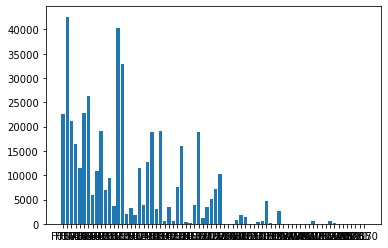

In [9]:
# Display violations vs no. of establishments
import matplotlib.pyplot as plt

vioKeys = vioDict.keys()
vioVals = vioDict.values()

plt.bar(vioKeys, vioVals)
plt.show()

In [31]:
# Find number of violations per vendor, and their zip code
insViosDict = {'Facility ID': [], 'Violations quant': [], 'Zip': []}
insViosDict
insVios = collection_vendors.find({'_id':{'$regex':'INS-'}}, {'FACILITY ID':1,'VIOLATIONS':1, 'FACILITY ZIP':1})
for r in insVios:
    if 'FACILITY ID' in r:
        insViosDict['Facility ID'].append(r['FACILITY ID'])
    else:
        insViosDict['Facility ID'].append(NA)
    if 'VIOLATIONS' in r:
        insViosDict['Violations quant'].append(len(r['VIOLATIONS']))
    else:
        insViosDict['Violations quant'].append(NA)
    if 'FACILITY ZIP' in r:
        insViosDict['Zip'].append(r['FACILITY ZIP'])
    else:
        insViosDict['Zip'].append(NA)


In [11]:
insViosDict

{'Facility ID': ['FA0067946',
  'FA0264213',
  'FA0002190',
  'FA0055091',
  'FA0159039',
  'FA0018414',
  'FA0041356',
  'FA0043096',
  'FA0251319',
  'FA0013745',
  'FA0058509',
  'FA0032856',
  'FA0064724',
  'FA0065791',
  'FA0021220',
  'FA0023163',
  'FA0003849',
  'FA0239410',
  'FA0058005',
  'FA0057216',
  'FA0159506',
  'FA0056882',
  'FA0263395',
  'FA0006621',
  'FA0010217',
  'FA0250109',
  'FA0037210',
  'FA0035435',
  'FA0167508',
  'FA0030935',
  'FA0224971',
  'FA0242918',
  'FA0167627',
  'FA0222140',
  'FA0164491',
  'FA0241511',
  'FA0222864',
  'FA0048643',
  'FA0240410',
  'FA0048944',
  'FA0060705',
  'FA0180883',
  'FA0015806',
  'FA0053996',
  'FA0156500',
  'FA0174918',
  'FA0163988',
  'FA0177875',
  'FA0007514',
  'FA0251976',
  'FA0249126',
  'FA0248490',
  'FA0041751',
  'FA0014923',
  'FA0055247',
  'FA0178400',
  'FA0176810',
  'FA0072087',
  'FA0064134',
  'FA0004954',
  'FA0143602',
  'FA0263377',
  'FA0248001',
  'FA0225588',
  'FA0179092',
  'FA02573

In [113]:
#  Create DataFrame - sorted by zip to make visualisations easier to understand
insViosDF = pd.DataFrame(insViosDict)
insViosDF.sort_values(by=['Zip'],inplace=True)
insViosDF

Facility ID  Violations quant    Zip
153446   FA0179864               4.0  90001
111340   FA0240043              11.0  90001
18051    FA0007499               2.0  90001
91882    FA0065680               5.0  90001
70362    FA0256979               6.0  90001
...            ...               ...    ...
28893    FA0035845               6.0  93591
104347   FA0033993               2.0  93591
65907    FA0143030               3.0  93591
65576    FA0180554               4.0  93591
165246   FA0031534               1.0  93591

[183865 rows x 3 columns]

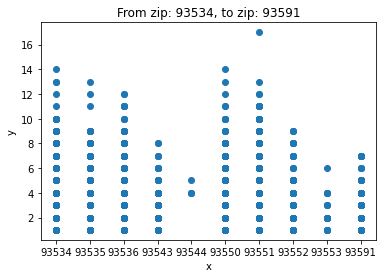

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
y = insViosDF['Violations quant'][180000:]
x = insViosDF['Zip'][180000:]

# y = [1, 2, 3, 4, 5, 6]
# x = ['50', '10', '10', '10', '10', '80']

# Plot
plt.scatter(x, y)
plt.title(f'From zip: {insViosDF["Zip"][180000:180001].item()}, to zip: {insViosDF["Zip"][183864:].item()}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [66]:
insViosDF['Violations quant']

130780    8
93522     6
4456      2
144026    7
67871     3
         ..
102793    4
104445    2
52106     4
93151     1
68269     1
Name: Violations quant, Length: 183865, dtype: object

In [36]:
insViosDF['Zip']

153446    90001
111340    90001
18051     90001
91882     90001
70362     90001
          ...  
28893     93591
104347    93591
65907     93591
65576     93591
165246    93591
Name: Zip, Length: 183865, dtype: object

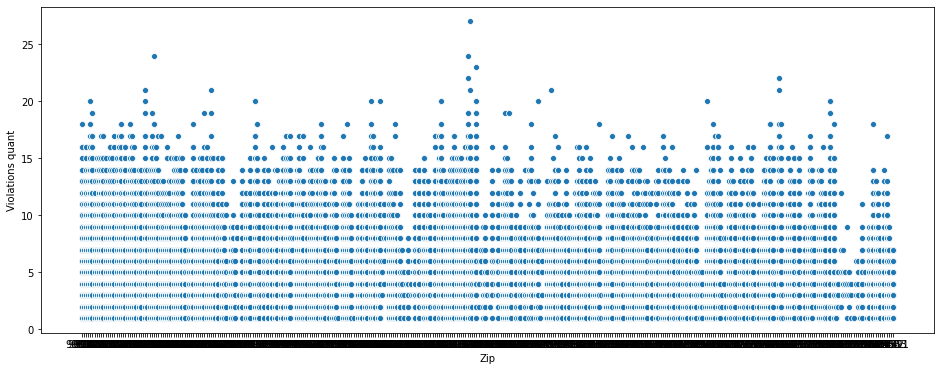

In [167]:
import seaborn as sns

# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(16, 6))
sns.scatterplot(x="Zip", y="Violations quant",
                data=insViosDF)

In [185]:
insViosDF.sort_values('Violations quant',ascending=False)

Facility ID  Violations quant    Zip
61383    FA0044489              27.0  90746
112596   FA0062901              24.0  90035
69736    FA0010110              24.0  90745
170467   FA0251708              23.0  90755
89555    FA0261966              22.0  91754
...            ...               ...    ...
77032    FA0022224               NaN  93552
35645    FA0054893               NaN  93552
146392   FA0051267               NaN  93552
34801    FA0171681               NaN  93552
151424   FA0031534               NaN  93591

[183865 rows x 3 columns]

In [157]:
# MEan of duplicates
groupedDF = insViosDF.groupby('Zip').mean().reset_index()
groupedDF

Zip  Violations quant
0    90001          5.334911
1    90002          4.147208
2    90003          5.461538
3    90004          4.724708
4    90005          5.895739
..     ...               ...
369  93550          3.286479
370  93551          3.935706
371  93552          2.602996
372  93553          2.500000
373  93591          3.103896

[374 rows x 2 columns]

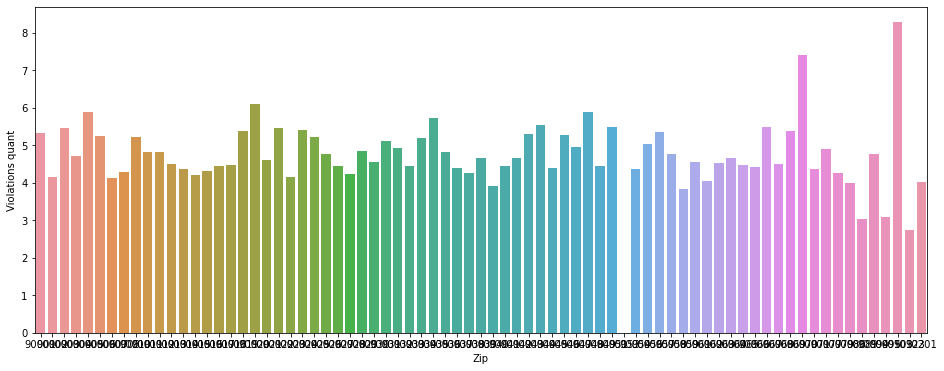

In [164]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Zip", y="Violations quant", data=groupedDF[:75])

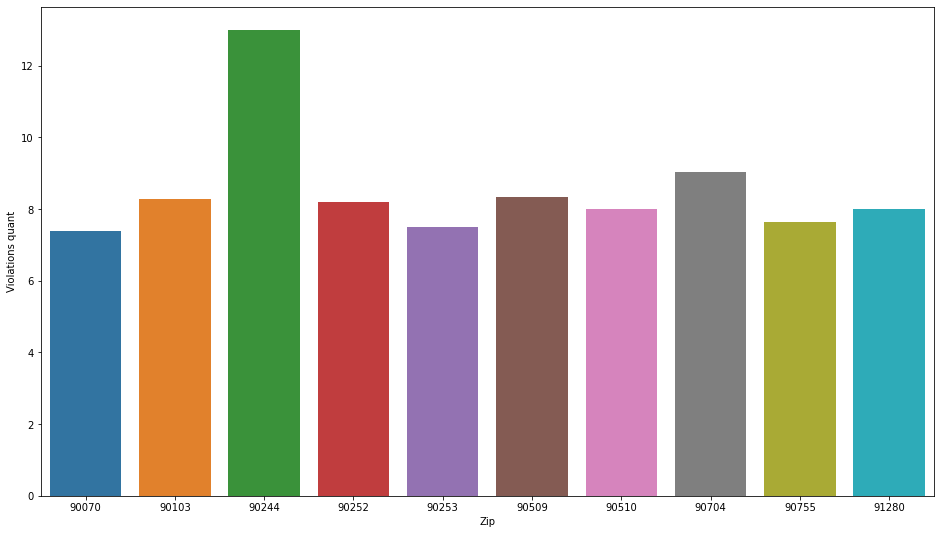

In [180]:
groupedDFSort = groupedDF.sort_values('Violations quant',ascending=False).reset_index(drop=True)
plt.figure(figsize=(16, 9))
sns.barplot(x="Zip", y="Violations quant", data=groupedDFSort.head(10))

In [161]:
len(groupedDF)

374

In [179]:
groupedDFSort


Zip  Violations quant
0    90244         13.000000
1    90704          9.043478
2    90509          8.333333
3    90103          8.285714
4    90252          8.200000
..     ...               ...
369  90353          1.000000
370  93021          1.000000
371  90053               NaN
372  90407               NaN
373  91763               NaN

[374 rows x 2 columns]

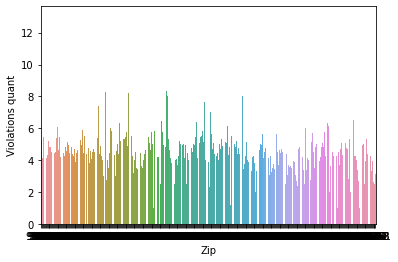

In [183]:
sns.barplot(groupedDFSort["Zip"], groupedDFSort["Violations quant"])

In [199]:
sns.heatmap(groupedDFSort)

TypeError: '<=' not supported between instances of 'str' and 'float'

In [26]:
# parseData("training_data/inventory_sm.csv")
# parseData("../training_data/Inspections.csv")
# parseData("../training_data/violations.csv")


x = pd.read_csv("../training_data/Inspections_md.csv", index_col='SERIAL NUMBER') 
# x.add_prefix('item_')
x.index = 'INS_' + x.index
x.to_dict(orient='records')
x

ACTIVITY DATE   OWNER ID                    OWNER NAME  \
SERIAL NUMBER                                                          
INS_DA0004KIJ    02/07/2019  OW0099597          ZARE INVESTMENTS INC   
INS_DA0004YWJ    12/17/2018  OW0255399               NRP GLOBAL INC.   
INS_DA0007F08    07/12/2018  OW0018671                    KEIU, ANDY   
INS_DA0007NP7    08/16/2017  OW0038850      WHOLE FOODS MARKET, INC.   
INS_DA0009NS7    06/05/2018  OW0007608  CHIPOTLE MEXICAN GRILL, INC.   
...                     ...        ...                           ...   
INS_DA04WSQXS    01/26/2017  OW0227639             TRAN HOLDINGS LLC   
INS_DA04WX8WQ    12/08/2017  OW0029458        RALPHS GROCERY COMPANY   
INS_DA04WZOVC    10/19/2017  OW0101133               B B BARGAIN INC   
INS_DA04XAACX    08/29/2018  OW0244787        THAI FOOD PICK UP, LLC   
INS_DA04XR18C    10/03/2018  OW0028696      PLATA ENTERTAINMENT, LLC   

              FACILITY ID                      FACILITY NAME  RECORD ID  \
SERIAL NUMBER                                                             
INS_DA0004KIJ   FA0067946                 ONE STOP SHOP MART  PR0040362   
INS_DA0004YWJ   FA0264213    SUPER TIENDA LATINA MEAT MARKET  PR0215282   
INS_DA0007F08   FA0002190                           PHO SO 1  PR0008114   
INS_DA0007NP7   FA0055091             WHOLE FOODS MARKET #39  PR0003009   
INS_DA0009NS7   FA0159039             CHIPOTLE MEXICAN GRILL  PR0147108   
...                   ...                                ...        ...   
INS_DA04WSQXS   FA0222856  SAIGON EDEN VIETNAMESE RESTAURANT  PR0177897   
INS_DA04WX8WQ   FA0069221                 RALPHS MARKET #280  PR0009185   
INS_DA04WZOVC   FA0137837                        B B BARGAIN  PR0122008   
INS_DA04XAACX   FA0250724                  THAI FOOD PICK UP  PR0199755   
INS_DA04XR18C   FA0018158                      THE BACK ROOM  PR0027696   

                                    PROGRAM NAME PROGRAM STATUS  \
SERIAL NUMBER                                                     
INS_DA0004KIJ                 ONE STOP SHOP MART         ACTIVE   
INS_DA0004YWJ    SUPER TIENDA LATINA MEAT MARKET         ACTIVE   
INS_DA0007F08                           PHO SO 1         ACTIVE   
INS_DA0007NP7               WHOLE FOODS #39-DELI         ACTIVE   
INS_DA0009NS7             CHIPOTLE MEXICAN GRILL         ACTIVE   
...                                          ...            ...   
INS_DA04WSQXS  SAIGON EDEN VIETNAMESE RESTAURANT         ACTIVE   
INS_DA04WX8WQ                RALPH'S BAKERY #280         ACTIVE   
INS_DA04WZOVC                         B B BARGIN         ACTIVE   
INS_DA04XAACX                  THAI FOOD PICK UP         ACTIVE   
INS_DA04XR18C                      THE BACK ROOM         ACTIVE   

               PROGRAM ELEMENT (PE)                          PE DESCRIPTION  \
SERIAL NUMBER                                                                 
INS_DA0004KIJ                  1610   FOOD MKT RETAIL (1-1,999 SF) LOW RISK   
INS_DA0004YWJ                  1612  FOOD MKT RETAIL (1-1,999 SF) HIGH RISK   
INS_DA0007F08                  1635      RESTAURANT (31-60) SEATS HIGH RISK   
INS_DA0007NP7                  1632       RESTAURANT (0-30) SEATS HIGH RISK   
INS_DA0009NS7                  1632       RESTAURANT (0-30) SEATS HIGH RISK   
...                             ...                                     ...   
INS_DA04WSQXS                  1638     RESTAURANT (61-150) SEATS HIGH RISK   
INS_DA04WX8WQ                  1631   RESTAURANT (0-30) SEATS MODERATE RISK   
INS_DA04WZOVC                  1610   FOOD MKT RETAIL (1-1,999 SF) LOW RISK   
INS_DA04XAACX                  1632       RESTAURANT (0-30) SEATS HIGH RISK   
INS_DA04XR18C                  1636      RESTAURANT (61-150) SEATS LOW RISK   

               ... SERVICE CODE SERVICE DESCRIPTION SCORE GRADE  EMPLOYEE ID  \
SERIAL NUMBER  ...                                                             
INS_DA0004KIJ  ...            1  ROUTINE 